In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.ticker as ticker
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import re
import argparse
import numpy as np

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


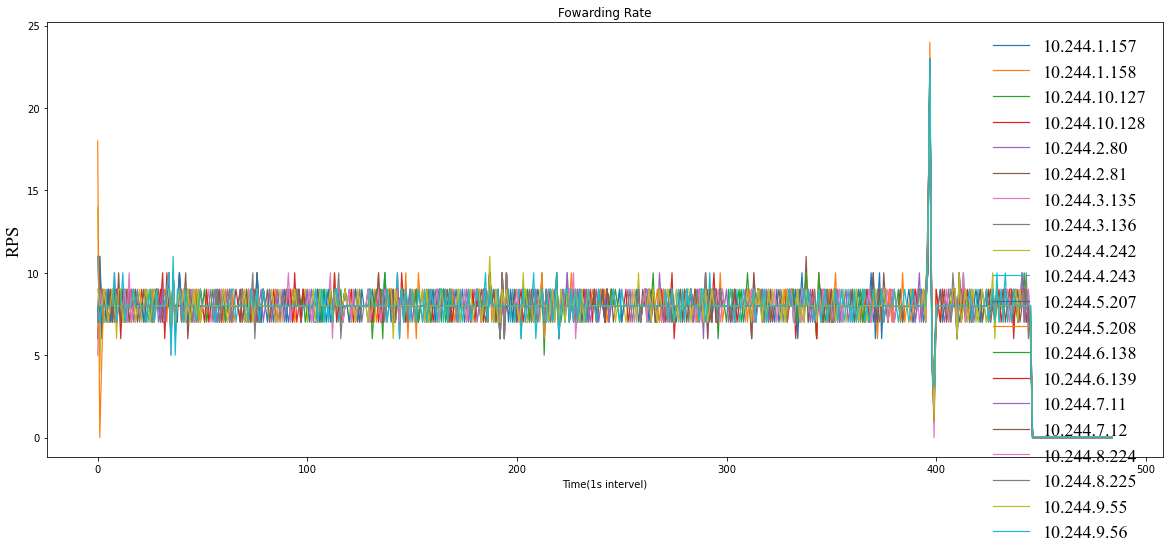

In [2]:
font1 = {'family' : 'Times New Roman',  
'weight' : 'normal',  
'size'   : 18,  
}

colors=list(mcolors.TABLEAU_COLORS.keys()) 

with open('G:\\test_data\\rate.txt', 'r') as f:
    min_seg = 512
    for line in f.readlines():
        line = line.strip()
        list1 = line.split(" ")
        label = list1[0].split(":")
        label = label[0]
        last_seg_ip = label.split(".")[-1]
        if min_seg > int(last_seg_ip):
            min_seg = int(last_seg_ip)
    
with open('G:\\test_data\\rate.txt', 'r') as f:
    plt.figure(figsize=(20,8)) 
    plt.title("Fowarding Rate")
    color_idx = 0
    for line in f.readlines():
        line = line.strip()
        list1 = line.split(" ")
        label = list1[0].split(":")
        label = label[0]
        last_seg_ip = label.split(".")[-1]
        #color_idx = int(last_seg_ip) - min_seg
        color_idx = color_idx % 10
        print(color_idx)
        x = range(0, len(list1) - 1)
        l = [int(item) for item in list1[1:]]        
        plt.plot(x, l, color=mcolors.TABLEAU_COLORS[colors[color_idx]], label=label, linewidth=1.2)  
        color_idx = color_idx + 1
        #plt.ylim((0, 400))       
        plt.ylabel("RPS", font1)
        plt.xlabel("Time(1s intervel)")
        hl=plt.legend(loc='upper right', prop=font1, frameon=False)

   
        

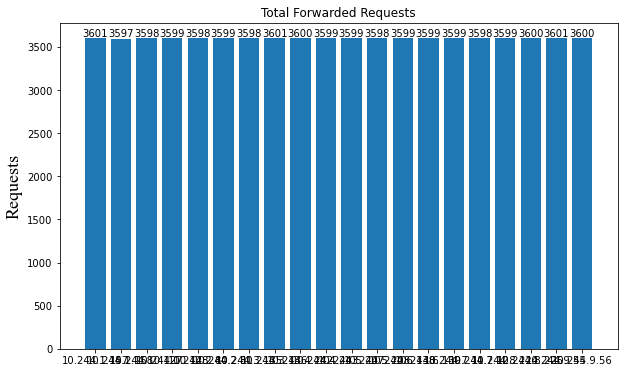

In [3]:
with open('G:\\test_data\\requests.txt', 'r') as f:
    ips = []
    requests = []
    for line in f.readlines():
        line = line.strip()
        ip, request = line.split(" ")
        label = ip.split(":")
        ips.append(label[0])
        requests.append(int(request))
    plt.figure(figsize=(10,6)) 
    plt.bar(ips, requests)
    plt.title('Total Forwarded Requests')
    plt.ylabel("Requests", font1)
    for a,b in zip(ips, requests):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)

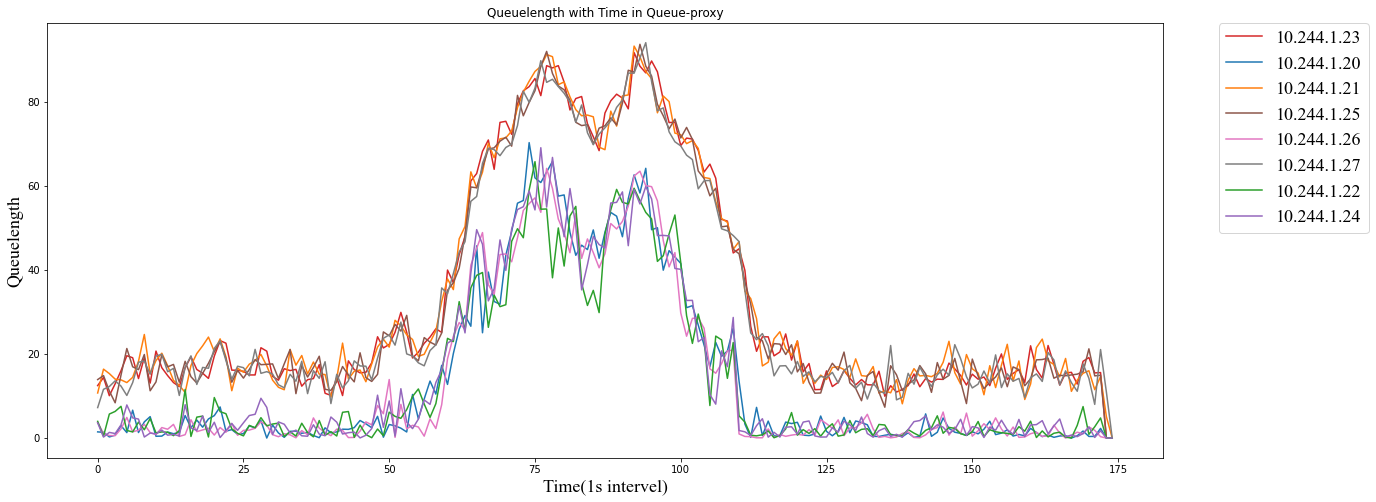

In [4]:
font3 = {'family' : 'Times New Roman',  
'weight' : 'normal',  
'size'   : 12,  
}
with open('G:\\test_data\\queuelength.txt', 'r') as f:
    min_seg = 512
    for line in f.readlines():
        line = line.strip()
        list1 = line.split(" ")
        label = list1[0].split(":")
        label = label[0]
        last_seg_ip = label.split(".")[-1]
        if min_seg > int(last_seg_ip):
            min_seg = int(last_seg_ip)
            
with open('G:\\test_data\\queuelength.txt', 'r') as f:
    plt.figure(figsize=(20,8)) 
    plt.title("Queuelength with Time in Queue-proxy")
    for line in f.readlines():
        line = line.strip()
        list1 = line.split(" ")
        label = list1[0].split(":")
        label = label[0]
        x = range(0, len(list1) - 1)
        l = [float(item) for item in list1[1:]]  
        #max_queue = max(l)
        #print("ip:", label, " max_queue:", max_queue)
        last_seg_ip = label.split(".")[-1]
        color_idx = int(last_seg_ip) - min_seg
        plt.plot(x, l, color=mcolors.TABLEAU_COLORS[colors[color_idx]], label=label, linewidth=1.5)
        plt.ylabel("Queuelength", font1)
        plt.xlabel("Time(1s intervel)", font1)
        #plt.ylim((0, 8))        
        #hl=plt.legend(loc='upper right', prop=font3, frameon=False)
        hl=plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),prop=font1,borderaxespad = 0.)
        

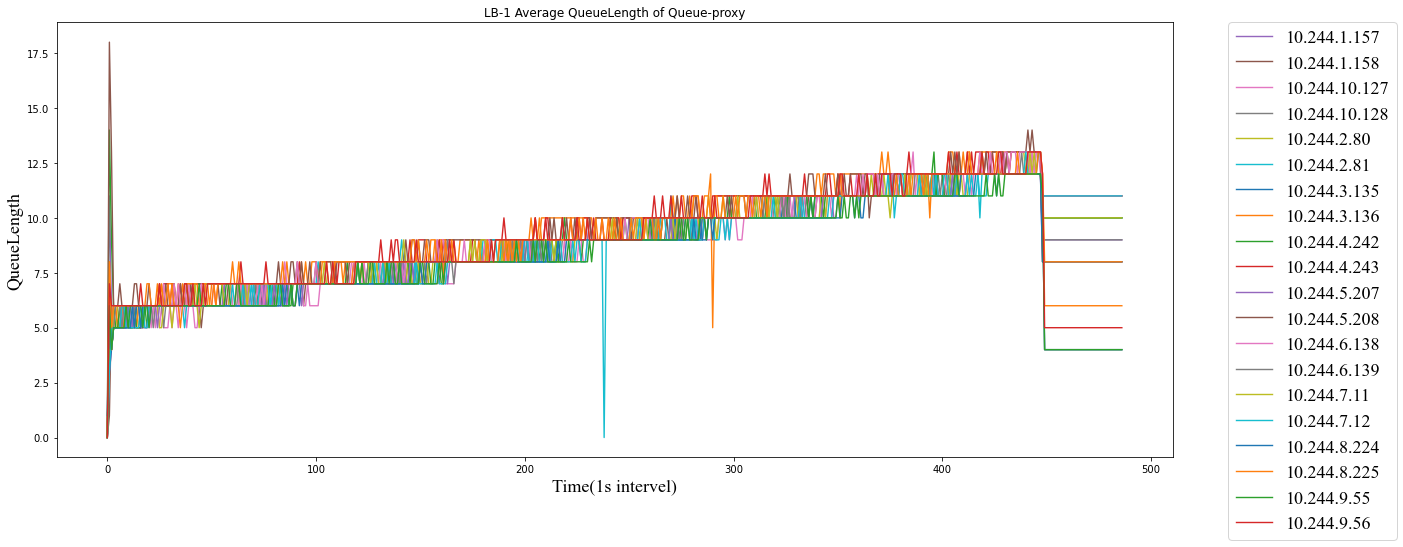

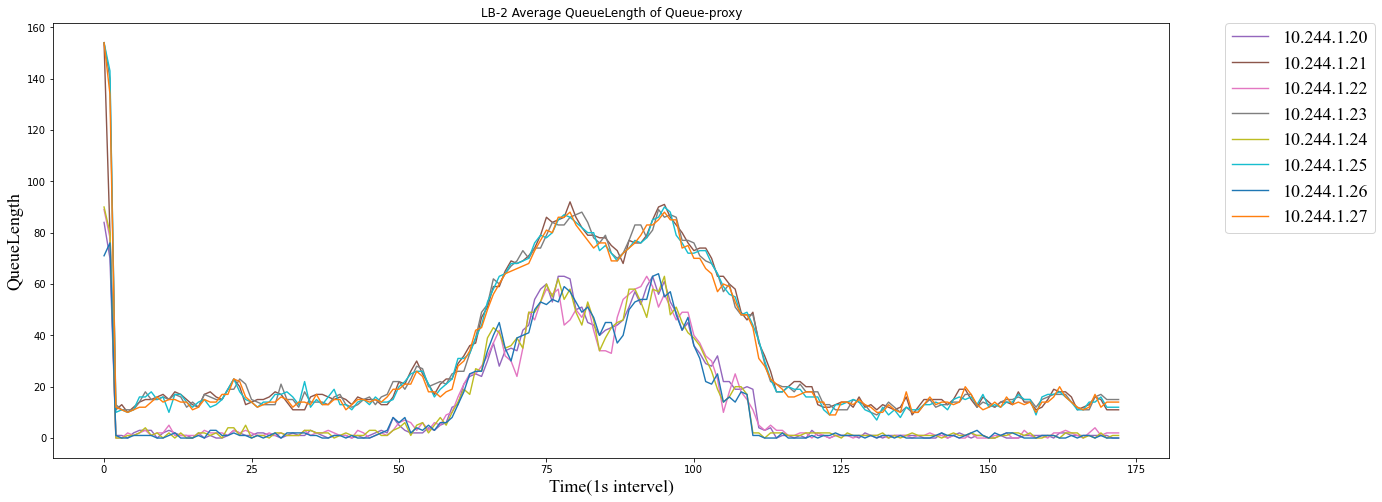

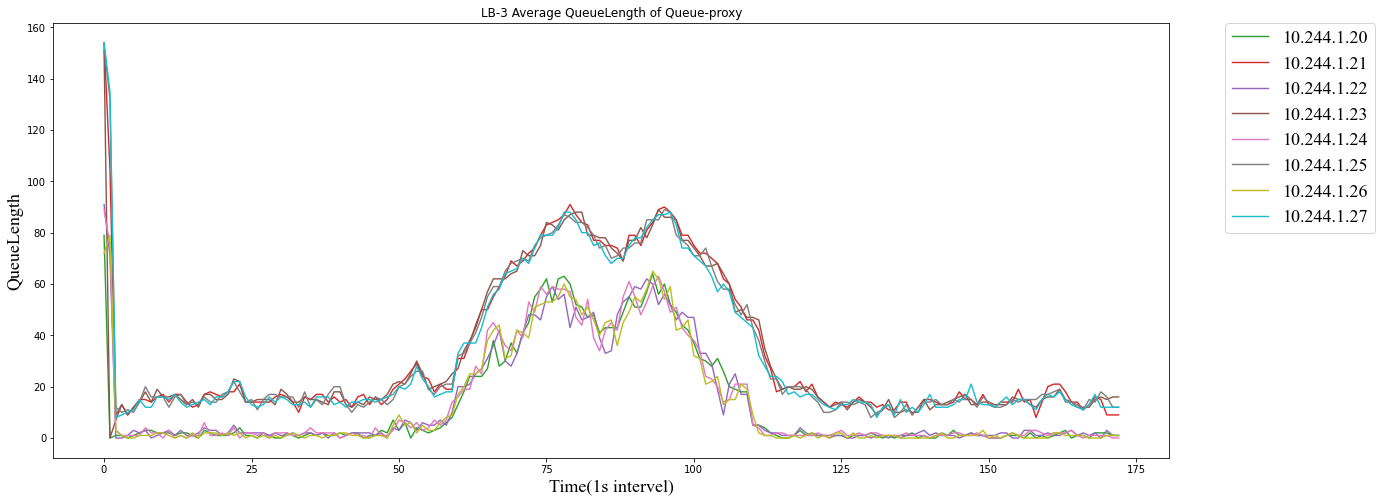

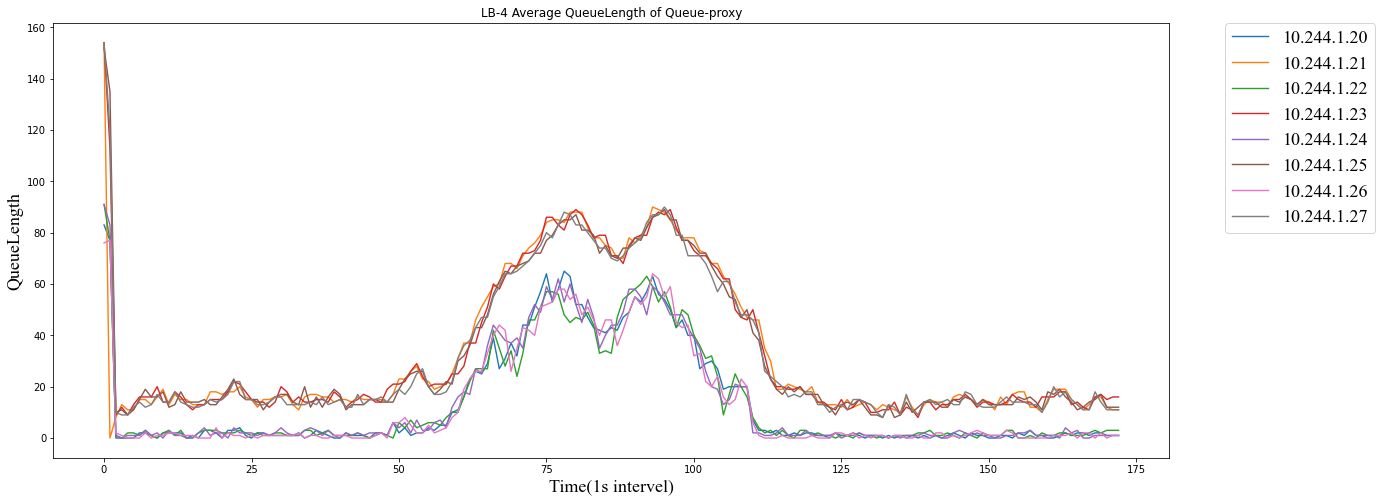

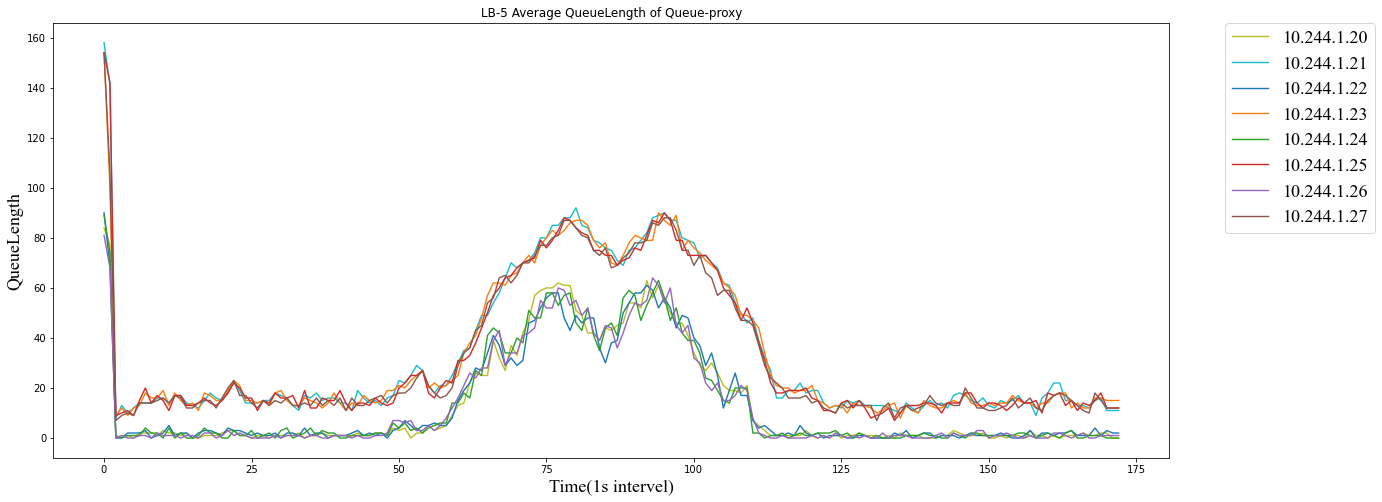

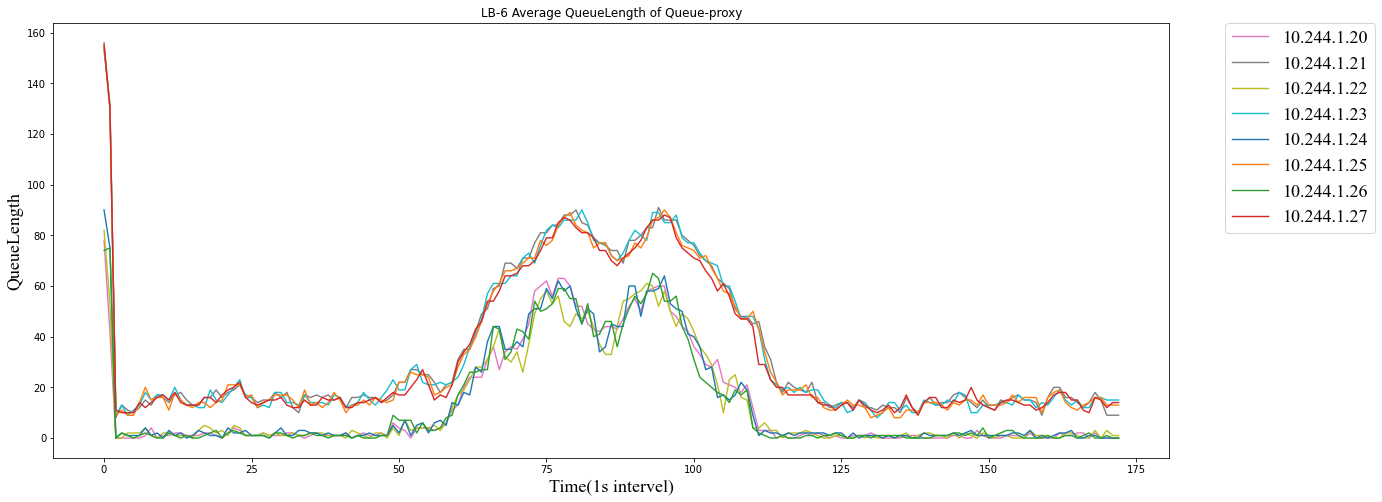

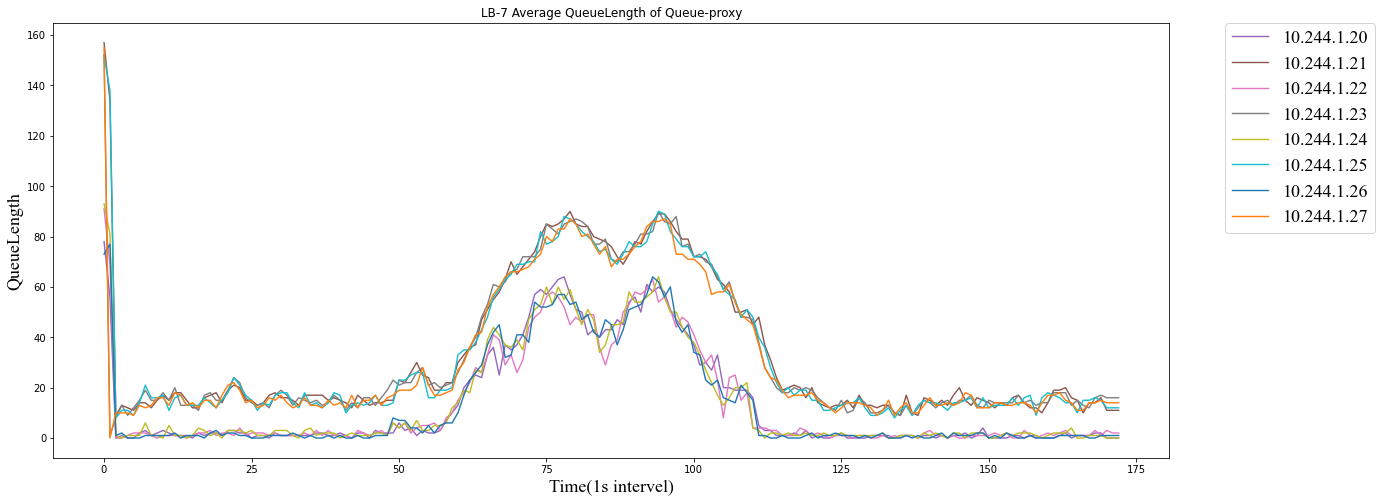

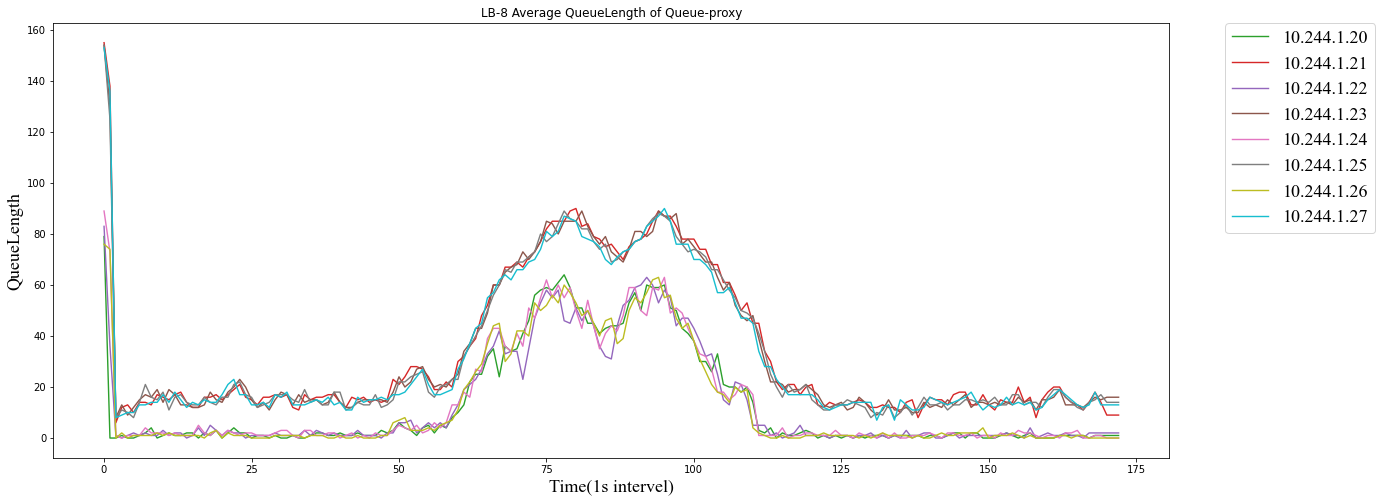

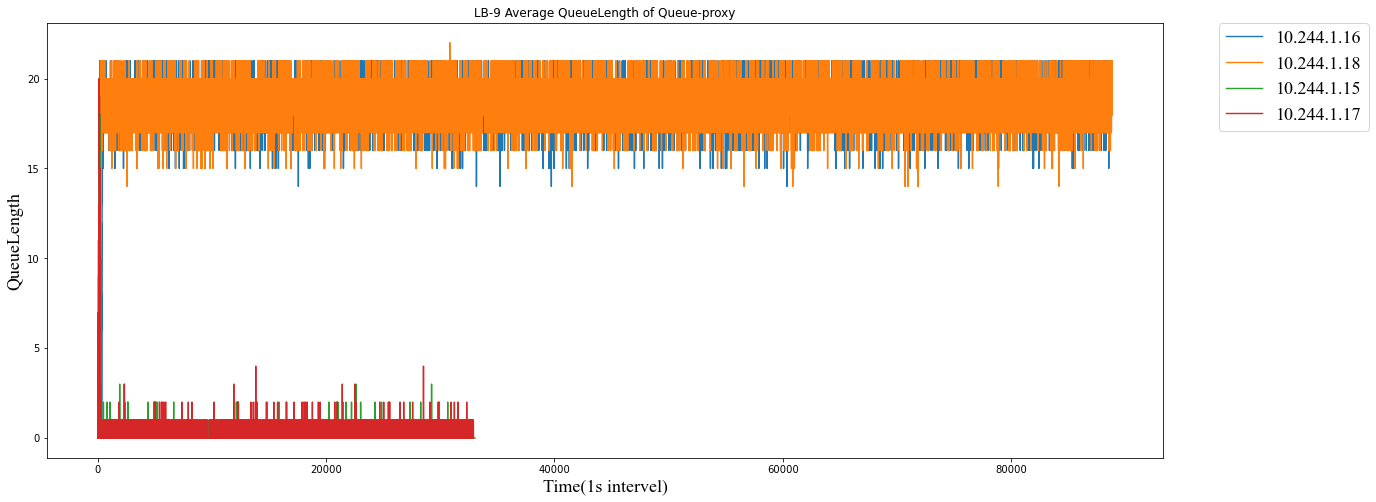

In [5]:
def file_name(file_dir, key_words):
    L=[]
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if file.find(key_words) >= 0:
                L.append(file)
    return L
path = "G:\\test_data\\"
files = file_name(path, "qlen.txt")
n = len(files)
for i in range(n):
    with open(path+files[i], 'r') as f:
        min_seg = 512
        for line in f.readlines():
            line = line.strip()
            list1 = line.split(" ")
            label = list1[0].split(":")
            label = label[0]
            last_seg_ip = label.split(".")[-1]
            if min_seg > int(last_seg_ip):
                min_seg = int(last_seg_ip)
            
    with open(path+files[i], 'r') as f:
        plt.figure(figsize=(20,8)) 
        plt.title("LB-" + str(i+1)+ " Average QueueLength of Queue-proxy")
        for line in f.readlines():
            line = line.strip()
            list1 = line.split(" ")
            label = list1[0].split(":")
            label = label[0]
            last_seg_ip = label.split(".")[-1]
            #color_idx = int(last_seg_ip) - min_seg
            color_idx = color_idx % 10
            x = range(0, len(list1) - 1)
            l = [int(item) for item in list1[1:]] 
            plt.plot(x, l, color=mcolors.TABLEAU_COLORS[colors[color_idx]], label=label, linewidth=1.4)
            color_idx = color_idx + 1
            plt.ylabel("QueueLength", font1)
            plt.xlabel("Time(1s intervel)", font1)
            #plt.ylim((0, 4))   
            #y_major_locator=MultipleLocator(20)
            #ax = plt.gca()
            #ax.yaxis.set_major_locator(y_major_locator)
            #hl=plt.legend(loc='upper right', prop=font1, frameon=False)
            hl=plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),prop=font1,borderaxespad = 0.)
            

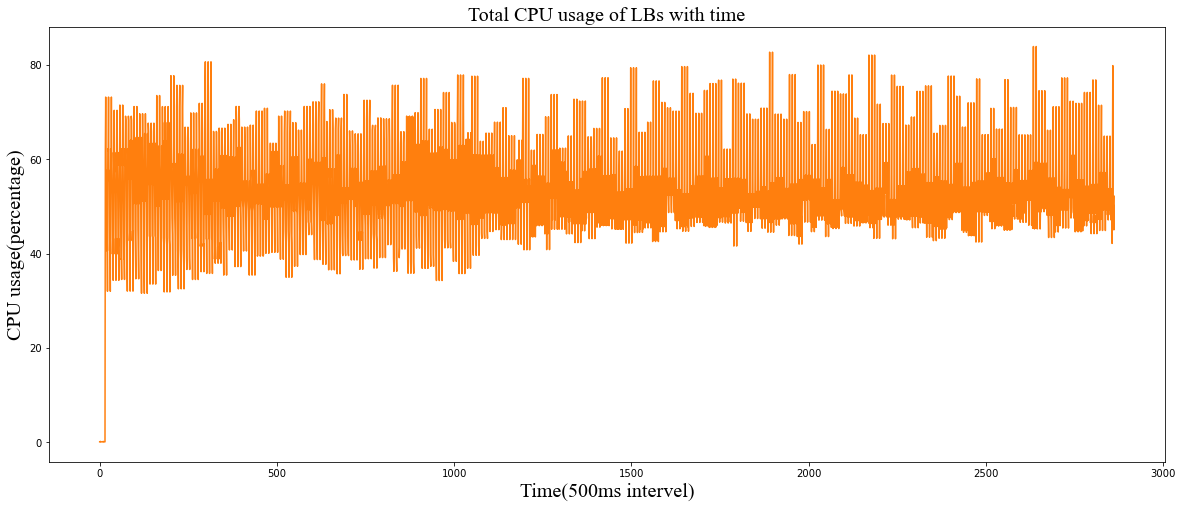

In [6]:
font2 = {'family' : 'Times New Roman',  
'weight' : 'normal',  
'size'   : 20,  
}
with open('G:\\test_data\\total_cpu_usage.txt', 'r') as f:
    i = 0
    plt.figure(figsize=(20,8)) 
    plt.title("Total CPU usage of LBs with time", font2)
    for line in f.readlines():
        line = line.strip()
        list1 = line.split(" ")
        x = range(0, len(list1))
        l = [float(item) for item in list1]    
        plt.plot(x, l, color=mcolors.TABLEAU_COLORS[colors[i+1]], label=label, linewidth=1.5)
        plt.ylabel("CPU usage(percentage)", font2)
        plt.xlabel("Time(500ms intervel)", font2)
        i += 1

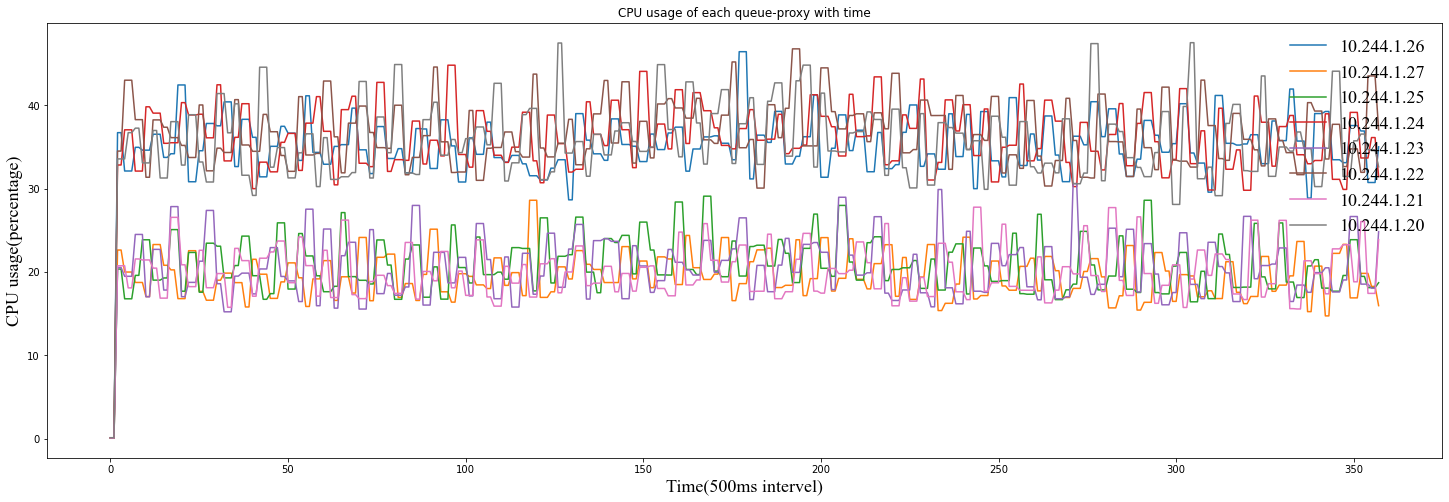

In [7]:
with open('G:\\test_data\\each_queueproxy_cpu_usage.txt', 'r') as f:
    i = 0
    plt.figure(figsize=(25,8)) 
    plt.title("CPU usage of each queue-proxy with time")
    for line in f.readlines():
        line = line.strip()
        list1 = line.split(" ")
        label = list1[0]
        x = range(0, len(list1) - 1)
        l = [float(item) for item in list1[1:]]    
        plt.plot(x, l, color=mcolors.TABLEAU_COLORS[colors[i]], label=label, linewidth=1.5)
        plt.ylabel("CPU usage(percentage)", font1)
        plt.xlabel("Time(500ms intervel)", font1)
        hl=plt.legend(loc='upper right', prop=font1, frameon=False)
        i += 1

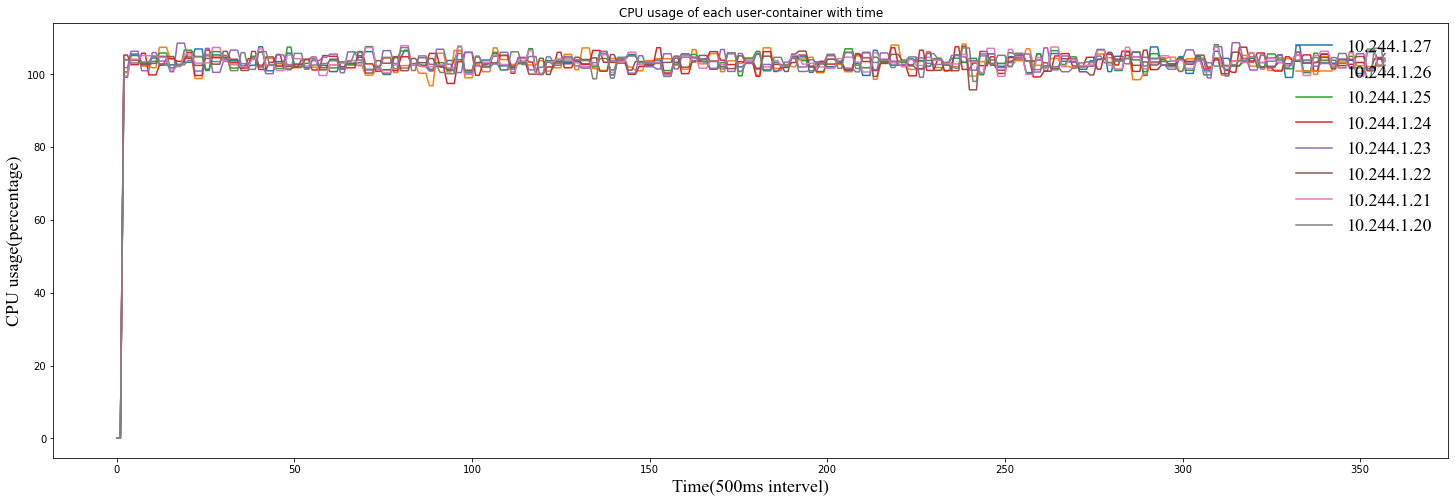

In [8]:
with open('G:\\test_data\\each_usercontainer_cpu_usage.txt', 'r') as f:
    i = 0
    plt.figure(figsize=(25,8)) 
    plt.title("CPU usage of each user-container with time")
    for line in f.readlines():
        line = line.strip()
        list1 = line.split(" ")
        label = list1[0]
        x = range(0, len(list1) - 1)
        l = [float(item) for item in list1[1:]]    
        plt.plot(x, l, color=mcolors.TABLEAU_COLORS[colors[i]], label=label, linewidth=1.5)
        plt.ylabel("CPU usage(percentage)", font1)
        plt.xlabel("Time(500ms intervel)", font1)
        hl=plt.legend(loc='upper right', prop=font1, frameon=False)
        i += 1

IndexError: list index out of range

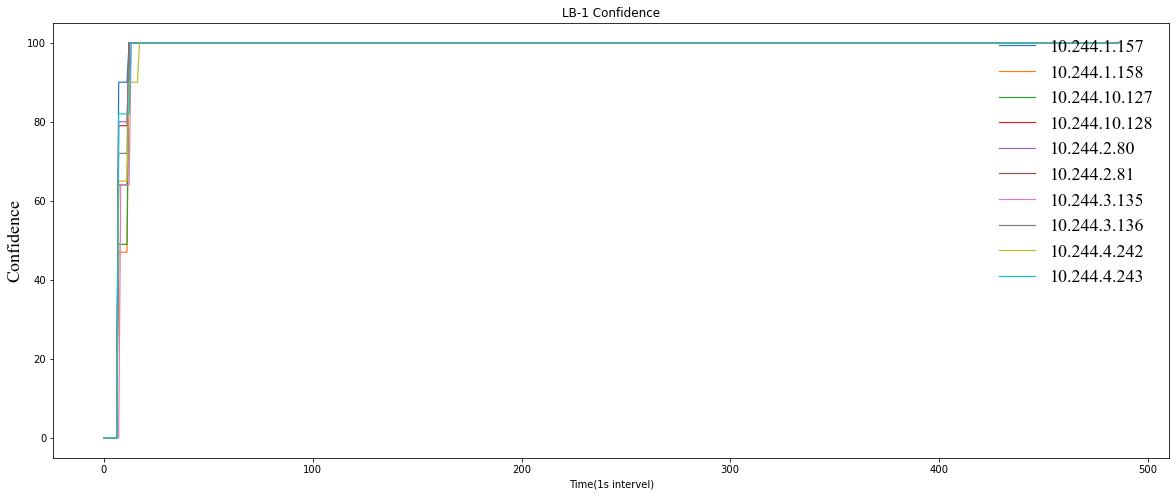

In [9]:
def file_name(file_dir, key_words):
    L=[]
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if file.find(key_words) >= 0:
                L.append(file)
    return L

path = "G:\\test_data\\"
files = file_name(path, "confidence_lb.txt")
n = len(files)

for i in range(n):
    with open(path+files[i], 'r') as f:
        plt.figure(figsize=(20,8)) 
        plt.title("LB-" + str(i+1)+ " Confidence")
        for line in f.readlines():
            line = line.strip()
            list1 = line.split(" ")
            label = list1[0].split(":")
            label = label[0]
            x = range(0, len(list1) - 1)
            l = [int(item) for item in list1[1:]] 
            plt.plot(x, l, color=mcolors.TABLEAU_COLORS[colors[i]], label=label, linewidth=1.2)
            plt.ylabel("Confidence", font1)
            plt.xlabel("Time(1s intervel)")
            hl=plt.legend(loc='upper right', prop=font1, frameon=False)
            i += 1
   
        

In [ ]:
path = "G:\\test_data\\"
files = file_name(path, "srate_lb.txt")
n = len(files)
for i in range(n):
    with open(path+files[i], 'r') as f:
        min_seg = 512
        for line in f.readlines():
            line = line.strip()
            list1 = line.split(" ")
            label = list1[0].split(":")
            label = label[0]
            last_seg_ip = label.split(".")[-1]
            if min_seg > int(last_seg_ip):
                min_seg = int(last_seg_ip)
            
    with open(path+files[i], 'r') as f:
        plt.figure(figsize=(20,8)) 
        plt.title("LB-" + str(i+1)+ " Service Rate")
        for line in f.readlines():
            line = line.strip()
            list1 = line.split(" ")
            label = list1[0].split(":")
            label = label[0]
            last_seg_ip = label.split(".")[-1]
            #color_idx = int(last_seg_ip) - min_seg
            color_idx = color_idx % 10
            x = range(0, len(list1) - 1)
            l = [int(item) for item in list1[1:]] 
            plt.plot(x, l, color=mcolors.TABLEAU_COLORS[colors[color_idx]], label=label, linewidth=1.4)
            color_idx = color_idx  + 1
            plt.ylabel("RPS", font1)
            plt.xlabel("Time(1s intervel)")
            y_major_locator=MultipleLocator(2)
            #plt.ylim((0, 80))  
            ax = plt.gca()
            ax.yaxis.set_major_locator(y_major_locator)
            hl=plt.legend(loc='upper right', prop=font1, frameon=False)
   

In [ ]:
path = "G:\\test_data\\"
files = file_name(path, "log_qlen.txt")
n = len(files)
for i in range(n):
    with open(path+files[i], 'r') as f:
        plt.figure(figsize=(20,8)) 
        plt.title("LB-" + str(i+1)+ " QueueLength")
        for line in f.readlines():
            line = line.strip()
            list1 = line.split(" ")
            label = list1[0].split(":")
            label = label[0]
            if label != "10.244.1.16":
                continue
            x = range(0, len(list1) - 1)
            l = [int(item) for item in list1[1:]] 
            plt.plot(x, l, color=mcolors.TABLEAU_COLORS[colors[i]], label=label, linewidth=1.4)
            plt.ylabel("Queuelength", font1)
            plt.xlabel("Time")
            #hl=plt.legend(loc='upper right', prop=font1, frameon=False)
            hl=plt.legend(loc=2, prop=font1, frameon=False, bbox_to_anchor=(1.0,1.0),borderaxespad = 0.3)
            i += 1
   

In [ ]:
path = "G:\\test_data\\"
files = file_name(path, "log_confidence.txt")
n = len(files)
for i in range(n):
    with open(path+files[i], 'r') as f:
        plt.figure(figsize=(20,8)) 
        plt.title("LB-" + str(i+1)+ " Confidence")
        for line in f.readlines():
            line = line.strip()
            list1 = line.split(" ")
            label = list1[0].split(":")
            label = label[0]
            x = range(0, len(list1) - 1)
            l = [int(item) for item in list1[1:]] 
            plt.plot(x, l, color=mcolors.TABLEAU_COLORS[colors[i]], label=label, linewidth=1.4)
            plt.ylabel("Confidence", font1)
            plt.xlabel("Time")
            #hl=plt.legend(loc='upper right', prop=font1, frameon=False)
            hl=plt.legend(loc=2, prop=font1, frameon=False, bbox_to_anchor=(1.0,1.0),borderaxespad = 0.3)
            i += 1
   

In [ ]:
path = "G:\\test_data\\"
files = file_name(path, "log_d_rate.txt")
n = len(files)
for i in range(n):
    with open(path+files[i], 'r') as f:
        plt.figure(figsize=(20,8)) 
        plt.title("LB-" + str(i+1)+ " Departure rate")
        for line in f.readlines():
            line = line.strip()
            list1 = line.split(" ")
            label = list1[0].split(":")
            label = label[0]
            if label != "10.244.1.16" and label != "10.244.1.15":
                continue
            x = range(0, len(list1) - 1)
            l = [float(item) for item in list1[1:]] 
            plt.plot(x, l, color=mcolors.TABLEAU_COLORS[colors[i]], label=label, linewidth=1.4)
            plt.ylabel("Departure rate", font1)
            plt.xlabel("Time")
            y_major_locator=MultipleLocator(10)
            ax = plt.gca()
            ax.yaxis.set_major_locator(y_major_locator)
            #hl=plt.legend(loc='upper right', prop=font1, frameon=False)
            hl=plt.legend(loc=2, prop=font1, frameon=False, bbox_to_anchor=(1.0,1.0),borderaxespad = 0.3)
            i += 1
   

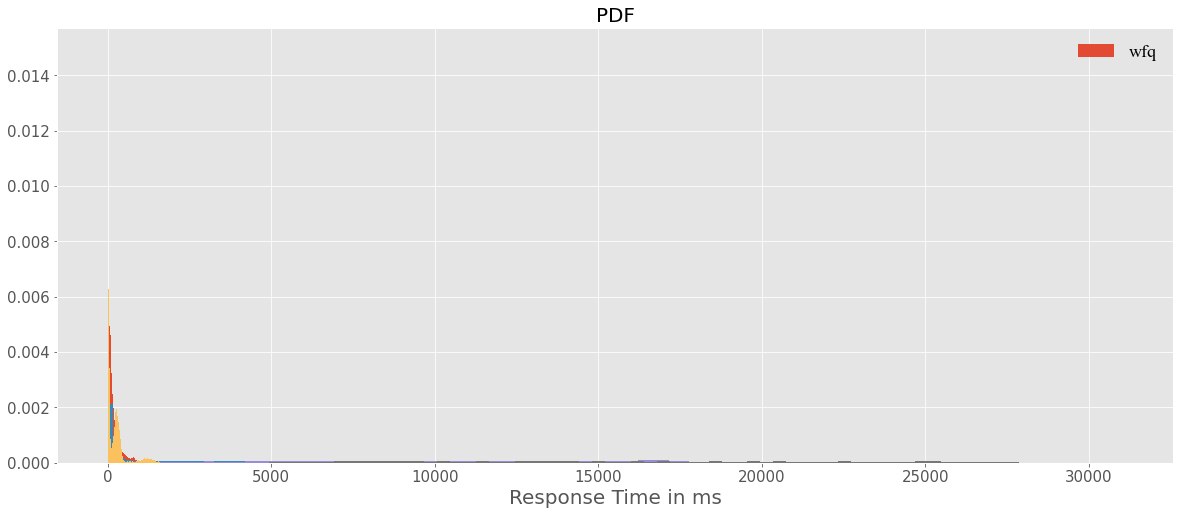

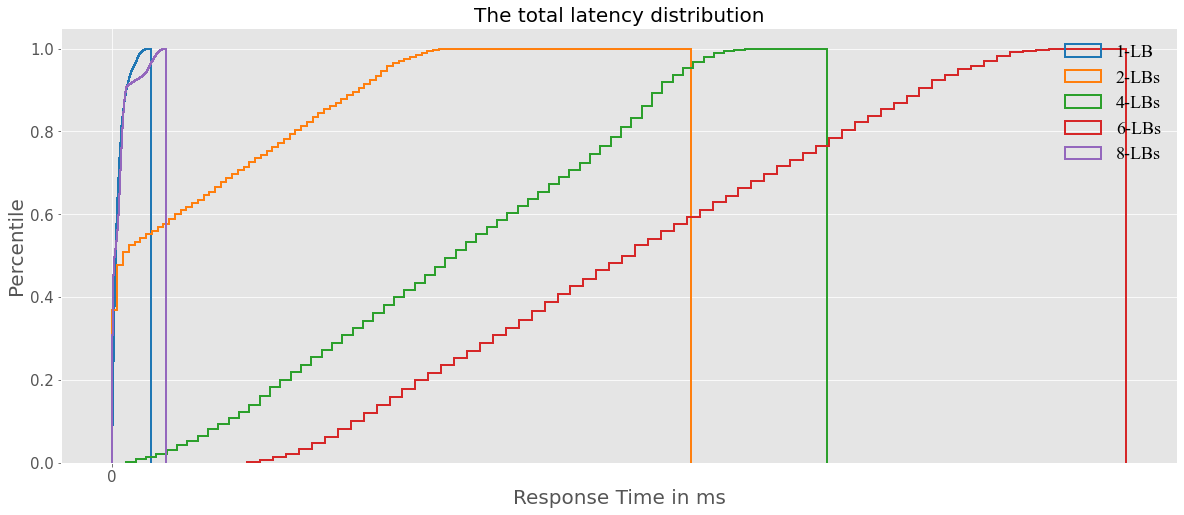

In [10]:

plt.style.use("ggplot")

# pass one or more log files
FILE_NAME = ["G:\\test_data\\1_lb.txt", "G:\\test_data\\2_lb.txt", "G:\\test_data\\4_lb.txt", "G:\\test_data\\6_lb.txt", "G:\\test_data\\8_lb.txt"]
#FILE_NAME = ["G:\\test_data\\wfq1.txt", "G:\\test_data\\wfq2.txt", "G:\\test_data\\wfq3.txt", "G:\\test_data\\wfq4.txt"]
#FILE_NAME = ["G:\\test_data\\least_conn.txt", "G:\\test_data\\wfq.txt"]
#FILE_NAME = ["G:\\test_data\\wfq.txt"]

parser = argparse.ArgumentParser()
parser.add_argument("-f", "--format", default="png",
                    help="Output format of the chart")

args = parser.parse_args()


def plot_pdf(distributions, name, output_format="png") -> None:
    plt.figure(figsize=(20,8))
    # log_normalized_distributions = [np.log(val) for val in distributions]
    for dist in distributions:
        plt.title(name)
        plt.tick_params(axis="both", labelsize=15)
        plt.xlabel("Response Time in ms", size=20)
        #plt.xticks(ticks = np.arange(0, max(dist), 20))
        plt.title(name, size=20)
        plt.hist(dist, bins='auto', density=True)
    #hl=plt.legend(loc='upper right', prop=font1, frameon=False, labels=['least_conn','wfq'])
    hl=plt.legend(loc='upper right', prop=font1, frameon=False, labels=['wfq'])
    plt.show()
    
    #plt.savefig(name+"."+output_format)


def plot_cdf(distributions, name, output_format="png") -> None:
    plt.figure(figsize=(20,8))
    i = 0
    for dist in distributions:
        plt.title(name)
        plt.tick_params(axis="both", labelsize=15)
        plt.xlabel("Response Time in ms", size=20)
        plt.xticks(ticks = np.arange(0, max(dist), 5000))
        plt.ylabel("Percentile", size=20)
        plt.title(name, size=20)
        plt.hist(dist, bins='auto', cumulative=True,
                 density=True, histtype='step', linewidth=2.0, color=mcolors.TABLEAU_COLORS[colors[i]])
        i = i+1
    hl=plt.legend(loc='upper right', prop=font1, frameon=False, labels=['1-LB','2-LBs', '4-LBs', '6-LBs','8-LBs'])
    #hl=plt.legend(loc='upper right', prop=font1, frameon=False, labels=['least_conn','wfq'])
    #hl=plt.legend(loc='upper right', prop=font1, frameon=False, labels=['wfq'])
    plt.show()
    #plt.savefig(name+"."+output_format)


if __name__ == "__main__":
    distributions = []

    for file in FILE_NAME:
        with open(file, 'r') as f:
            latency_values = []
            for line in f:
                line = line.strip()
                if re.search(re.compile("MULogs:.*elapsed.*time", re.IGNORECASE), line):
                    tokens = line.split(":")
                    if len(tokens) == 0:
                        break
                    value = float(tokens[-1])
                    latency_values.append(value)
            distributions.append(latency_values)

    plot_pdf(distributions, name="PDF", output_format=args.format)
    plot_cdf(distributions, name="The total latency distribution", output_format=args.format)

1194726.5


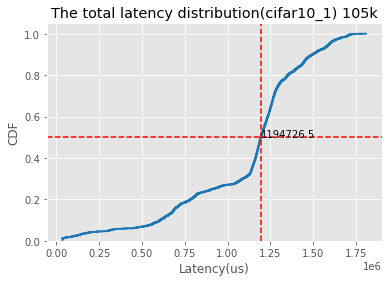

1029676.5


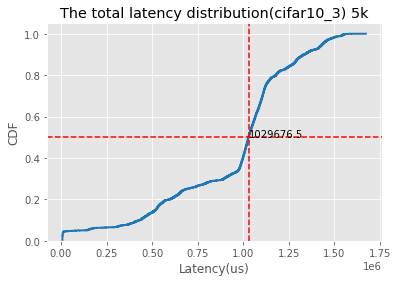

1108871.5


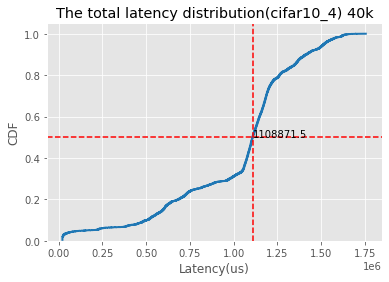

1482425.0


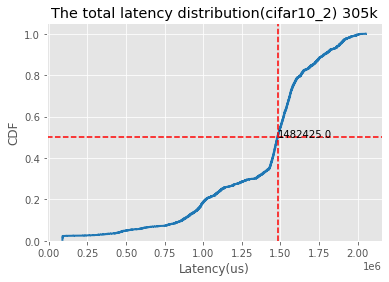

In [11]:
plt.style.use("ggplot")

# pass one or more log files
FILE_NAME = ["G:\\test_data\\1_lb.txt", "G:\\test_data\\2_lb.txt", "G:\\test_data\\4_lb.txt", "G:\\test_data\\6_lb.txt", "G:\\test_data\\8_lb.txt"]
#FILE_NAME = ["G:\\test_data\\wfq1.txt", "G:\\test_data\\wfq2.txt", "G:\\test_data\\wfq3.txt", "G:\\test_data\\wfq4.txt"]
#FILE_NAME = ["G:\\test_data\\least_conn.txt", "G:\\test_data\\wfq.txt"]
#FILE_NAME = ["G:\\test_data\\wfq.txt"]

parser = argparse.ArgumentParser()
parser.add_argument("-f", "--format", default="png",
                    help="Output format of the chart")

args = parser.parse_args()


def plot_pdf(distributions, name, output_format="png") -> None:
    plt.figure(figsize=(20,8))
    # log_normalized_distributions = [np.log(val) for val in distributions]
    for dist in distributions:
        plt.title(name)
        plt.tick_params(axis="both", labelsize=15)
        plt.xlabel("Response Time in ms", size=20)
        #plt.xticks(ticks = np.arange(0, max(dist), 20))
        plt.title(name, size=20)
        plt.hist(dist, bins='auto', density=True)
    #hl=plt.legend(loc='upper right', prop=font1, frameon=False, labels=['least_conn','wfq'])
    hl=plt.legend(loc='upper right', prop=font1, frameon=False, labels=['wfq'])
    plt.show()
    
    #plt.savefig(name+"."+output_format)

def fix_hist_step_vertical_line_at_end(ax):
    axpolygons = [poly for poly in ax.get_children() if isinstance(poly, mpl.patches.Polygon)]
    for poly in axpolygons:
        poly.set_xy(poly.get_xy()[:-1])
        
def plot_cdf(distributions, name, output_format="png") -> None:
    #plt.figure(figsize=(20,8))
    i = 0
    for dist in distributions:
        #plt.title(name)
        #plt.tick_params(axis="both", labelsize=15)
        #plt.xlabel("Response Time in ms", size=20)
        #plt.xticks(ticks = np.arange(0, max(dist), interval))
        #plt.ylabel("Percentile", size=20)
        #plt.title(name, size=20)
        #get 50% precentile value
        a = np.array(dist)
        p = np.percentile(a, 50)
        fig, ax = plt.subplots()
        ax.axvline(x=p,color='red', linestyle='--')
        ax.axhline(y=0.5, color='red',linestyle='--')
        print(p)
        ax.annotate(str(p), xy=(p,0.5))
        ax.set_title(name)
        ax.set_xlabel('Latency(us)')
        ax.set_ylabel('CDF')
        plt.hist(dist, bins=1000, cumulative=True,
                 density=True, histtype='step', linewidth=2.0, color=mcolors.TABLEAU_COLORS[colors[i]])
        i = i+1
    #hl=plt.legend(loc='upper right', prop=font1, frameon=False, labels=['1-LB','2-LBs', '4-LBs', '6-LBs','8-LBs'])
    #hl=plt.legend(loc='upper right', prop=font1, frameon=False, labels=['least_conn','wfq'])
    #hl=plt.legend(loc='upper right', prop=font1, frameon=False, labels=['wfq'])      
        fix_hist_step_vertical_line_at_end(ax)
    plt.show()
    #plt.savefig(name+"."+output_format)

if __name__ == "__main__":
    import json
    f.close()
    f = open('G:\\test_data\\edf_total_time.txt', 'r')
    js = f.read()
    f.close()
    distributions = json.loads(js)
    for key, value in distributions.items():
        dict_i = []
        dict_i.append(value)
        func_name = ""
        if key == "cifar10_2":
            func_name = "305k"
        elif key == "cifar10_4":
            func_name = "40k"
        elif key == "cifar10_3":
            func_name = "5k"
        elif key == "cifar10_1":
            func_name = "105k"
        name = "The total latency distribution" + "(" + key + ")" + " " +  func_name
        plot_cdf(dict_i, name=name, output_format=args.format)
    

SRSF
EDF


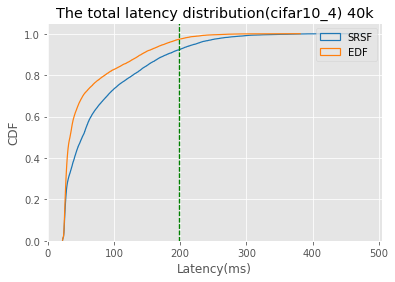

SRSF
EDF


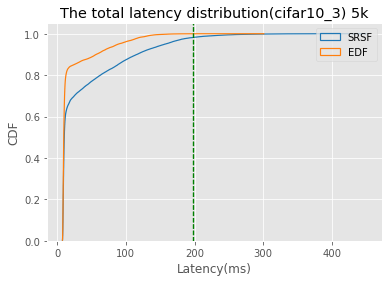

SRSF
EDF


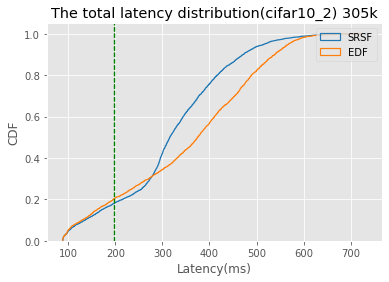

SRSF
EDF


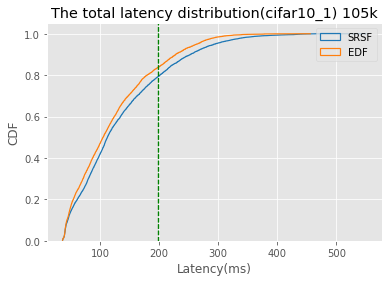

In [72]:
plt.style.use("ggplot")

# pass one or more log files
FILE_NAME = ["G:\\test_data\\1_lb.txt", "G:\\test_data\\2_lb.txt", "G:\\test_data\\4_lb.txt", "G:\\test_data\\6_lb.txt", "G:\\test_data\\8_lb.txt"]
#FILE_NAME = ["G:\\test_data\\wfq1.txt", "G:\\test_data\\wfq2.txt", "G:\\test_data\\wfq3.txt", "G:\\test_data\\wfq4.txt"]
#FILE_NAME = ["G:\\test_data\\least_conn.txt", "G:\\test_data\\wfq.txt"]
#FILE_NAME = ["G:\\test_data\\wfq.txt"]

parser = argparse.ArgumentParser()
parser.add_argument("-f", "--format", default="png",
                    help="Output format of the chart")

args = parser.parse_args()

deadline = {
    "cifar10_1": 197.588,
    "cifar10_2": 197.588,
    "cifar10_3": 197.588,
    "cifar10_4": 197.588,
    "cifar10_11":73.076,
    "cifar10_7":54.807
}
def plot_pdf(distributions, name, output_format="png") -> None:
    plt.figure(figsize=(20,8))
    # log_normalized_distributions = [np.log(val) for val in distributions]
    for dist in distributions:
        plt.title(name)
        plt.tick_params(axis="both", labelsize=15)
        plt.xlabel("Response Time in ms", size=20)
        #plt.xticks(ticks = np.arange(0, max(dist), 20))
        plt.title(name, size=20)
        plt.hist(dist, bins='auto', density=True)
    #hl=plt.legend(loc='upper right', prop=font1, frameon=False, labels=['least_conn','wfq'])
    hl=plt.legend(loc='upper right', prop=font1, frameon=False, labels=['wfq'])
    plt.show()
    
    #plt.savefig(name+"."+output_format)

def fix_hist_step_vertical_line_at_end(ax):
    axpolygons = [poly for poly in ax.get_children() if isinstance(poly, mpl.patches.Polygon)]
    for poly in axpolygons:
        poly.set_xy(poly.get_xy()[:-1])
        
def plot_cdf(distributions, name, output_format="png") -> None:
    #plt.figure(figsize=(20,8))
    func_name = ""
    if name == "cifar10_2":
        func_name = "305k"
    elif name == "cifar10_4":
        func_name = "40k"
    elif name == "cifar10_3":
        func_name = "5k"
    elif name == "cifar10_1":
        func_name = "105k"
    elif name == "cifar10_11":
        func_name = "5k-3"
    elif name == "cifar10_7":
        func_name = "5k-2"
        
        
    title = "The total latency distribution" + "(" + name + ")" + " " +  func_name
    i = 0
    fig, ax = plt.subplots()
    #ax.set_xlim([0, 1900000])
    ax.set_title(title)
    ax.set_xlabel('Latency(ms)')
    ax.set_ylabel('CDF')
    
    #ax.axvline(x=p,color='red', linestyle='--')
    #ax.axhline(y=0.5, color='red',linestyle='--')
        #print(p)
        #ax.annotate(str(p), xy=(p,0.5))
        #ax.set_title(name)
        #ax.set_xlabel('Latency(us)')
        #ax.set_ylabel('CDF')
    legent_list = ["SRSF", "EDF"]
    #legent_list = ["EDF-10m", "EDF-2m"]
    
    for dist in distributions: 
        print(legent_list[i])
        a = np.array(dist)
        p = np.percentile(a, 50)
        ax.axvline(x=deadline[name],color='green', linestyle='--',linewidth=1.2)
        ax.hist(dist, bins=10000, cumulative=True,
                 density=True, histtype='step', linewidth=1.2, color=mcolors.TABLEAU_COLORS[colors[i]], label=legent_list[i])     
        fix_hist_step_vertical_line_at_end(ax)
        ax.legend()
        i = i+1
    plt.show()
    #plt.savefig(name+"."+output_format)

if __name__ == "__main__":
    import json
    f.close()
    #f = open('G:\\test_data\\srsf_total_time.txt', 'r')
    f = open('G:\\test_data\\mix_srsf_96_total_time.txt', 'r')
    f2 = open('G:\\test_data\\mix_edf_96_total_time.txt', 'r')
    js = f.read()
    f.close()
    js2 = f2.read()
    f2.close()
    distributions = json.loads(js)
    distributions2 = json.loads(js2)
    dict_i = defaultdict(list)
    func_name = ""
    for key, value in distributions.items(): #srsf
        new_value = [i/1000 for i in value]
        dict_i[key].append(new_value)
           
    for key, value in distributions2.items(): #edf
        new_value = [i/1000 for i in value]
        dict_i[key].append(new_value)
    
   # key = "cifar10_4"
   # plot_cdf(dict_i[key], name=key, output_format=args.format)
    for key, value in distributions2.items():
        plot_cdf(dict_i[key], name=key, output_format=args.format)
    

srsf+ 5k  p10= 11.6401  p50= 81.216  p80= 178.46680000000003  p90= 253.3969000000001  p95= 339.7426999999999
srsf+ 40k  p10= 13.55  p50= 84.95949999999999  p80= 186.122  p90= 266.784  p95= 357.89649999999995
srsf+ 105k  p10= 13.6896  p50= 85.036  p80= 189.6186  p90= 284.63980000000004  p95= 374.95224999999994
srsf+ 305k  p10= 13.287200000000002  p50= 85.882  p80= 203.54840000000002  p90= 333.3860000000001  p95= 463.8849999999999
edf+ 105k  p10= 55.419399999999996  p50= 72.7  p80= 103.60620000000002  p90= 133.7074  p95= 180.3647999999999
edf+ 305k  p10= 153.324  p50= 173.416  p80= 205.94  p90= 238.673  p95= 293.784
edf+ 40k  p10= 25.0354  p50= 39.546  p80= 59.354600000000005  p90= 94.31139999999999  p95= 135.56624999999974
edf+ 5k  p10= 2.622  p50= 12.2775  p80= 25.079400000000007  p90= 62.68380000000002  p95= 93.31599999999995
SRSF
EDF


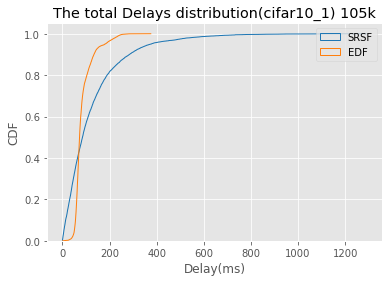

SRSF
EDF


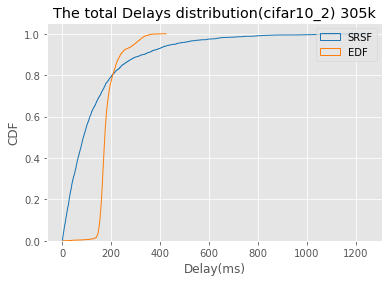

SRSF
EDF


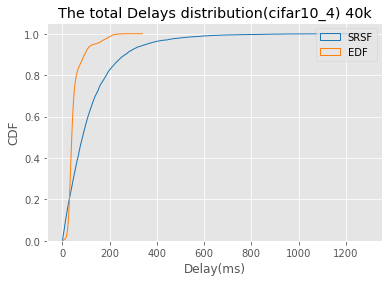

SRSF
EDF


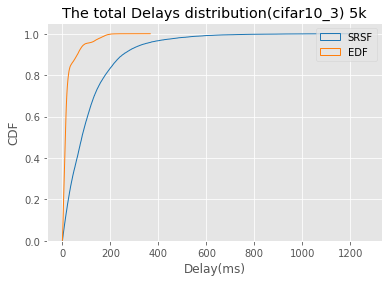

In [12]:
plt.style.use("ggplot")

deadline = {
    "cifar10_1": 255,
    "cifar10_2": 581,
    "cifar10_3": 73,
    "cifar10_4": 162,
}
def plot_pdf(distributions, name, output_format="png") -> None:
    plt.figure(figsize=(20,8))
    # log_normalized_distributions = [np.log(val) for val in distributions]
    for dist in distributions:
        plt.title(name)
        plt.tick_params(axis="both", labelsize=15)
        plt.xlabel("Response Time in ms", size=20)
        #plt.xticks(ticks = np.arange(0, max(dist), 20))
        plt.title(name, size=20)
        plt.hist(dist, bins='auto', density=True)
    #hl=plt.legend(loc='upper right', prop=font1, frameon=False, labels=['least_conn','wfq'])
    hl=plt.legend(loc='upper right', prop=font1, frameon=False, labels=['wfq'])
    plt.show()
    
    #plt.savefig(name+"."+output_format)

def fix_hist_step_vertical_line_at_end(ax):
    axpolygons = [poly for poly in ax.get_children() if isinstance(poly, mpl.patches.Polygon)]
    for poly in axpolygons:
        poly.set_xy(poly.get_xy()[:-1])
        
def plot_cdf(distributions, name, output_format="png") -> None:
    #plt.figure(figsize=(20,8))
    func_name = ""
    if name == "cifar10_2":
        func_name = "305k"
    elif name == "cifar10_4":
        func_name = "544k"
    elif name == "cifar10_3":
        func_name = "5k"
    elif name == "cifar10_1":
        func_name = "105k"
        
    title = "The total Delays distribution" + "(" + name + ")" + " " +  func_name
    i = 0
    fig, ax = plt.subplots()
    #ax.set_xlim([0, 1900000])
    ax.set_title(title)
    ax.set_xlabel('Delay(ms)')
    ax.set_ylabel('CDF')
    
    #ax.axvline(x=p,color='red', linestyle='--')
    #ax.axhline(y=0.5, color='red',linestyle='--')
        #print(p)
        #ax.annotate(str(p), xy=(p,0.5))
        #ax.set_title(name)
        #ax.set_xlabel('Latency(us)')
        #ax.set_ylabel('CDF')
    legent_list = ["SRSF", "EDF"]
    
    for dist in distributions: 
        print(legent_list[i])
        a = np.array(dist)
        p = np.percentile(a, 50)
        ax.hist(dist, bins=10000, cumulative=True,
                 density=True, histtype='step', linewidth=1.0, color=mcolors.TABLEAU_COLORS[colors[i]], label=legent_list[i])     
        fix_hist_step_vertical_line_at_end(ax)
        ax.legend()
        i = i+1
    plt.show()
    #plt.savefig(name+"."+output_format)

if __name__ == "__main__":
    import json
    f.close()
    f = open('G:\\test_data\\srsf_delays.txt', 'r')
    f2 = open('G:\\test_data\\edf_delays.txt', 'r')
    js = f.read()
    f.close()
    js2 = f2.read()
    f2.close()
    distributions = json.loads(js)
    distributions2 = json.loads(js2)
    dict_i = defaultdict(list)
    func_name = ""
    func_name_dict = {
                "cifar10_1": "105k",
                "cifar10_2": "305k",
                "cifar10_3": "5k",
                "cifar10_4": "40k",
                "resize": "resize"
    }

    for key, value in distributions.items(): 
        new_value = [i/1000 for i in value]
        p10 = np.percentile(new_value, 10)
        p50 = np.percentile(new_value, 50)
        p80 = np.percentile(new_value, 80)
        p90 = np.percentile(new_value, 90)
        p95 = np.percentile(new_value, 95)
        dict_i[key].append(new_value)
        print("srsf+", func_name_dict[key], " p10=", p10, " p50=", p50, " p80=", p80, " p90=", p90,
             " p95=", p95)
           
    for key, value in distributions2.items():  
        new_value = [i/1000 for i in value]
        p10 = np.percentile(new_value, 10)
        p50 = np.percentile(new_value, 50)
        p80 = np.percentile(new_value, 80)
        p90 = np.percentile(new_value, 90)
        p95 = np.percentile(new_value, 95)
        dict_i[key].append(new_value)
        print("edf+", func_name_dict[key], " p10=", p10, " p50=", p50, " p80=", p80, " p90=", p90,
             " p95=", p95)
    
   # key = "cifar10_4"
   # plot_cdf(dict_i[key], name=key, output_format=args.format)
    for key, value in distributions2.items():     
        plot_cdf(dict_i[key], name=key, output_format=args.format)
    

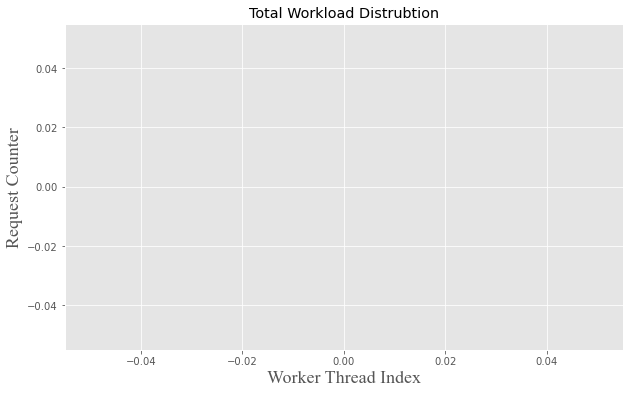

In [13]:
with open('G:\\test_data\\total_workload.txt', 'r') as f:
    threads = []
    workloads = []
    for line in f.readlines():
        line = line.strip()
        thread, workload = line.split(" ")
        threads.append(thread)
        workloads.append(int(workload))
    plt.figure(figsize=(10,6)) 
    plt.bar(threads,workloads)
    plt.title('Total Workload Distrubtion')
    plt.ylabel("Request Counter", font1)
    plt.xlabel("Worker Thread Index", font1)
    for a,b in zip(threads, workloads):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)

In [ ]:
with open('G:\\test_data\\total_real_time_workload.txt', 'r') as f:
    threads = []
    workloads = []
    for line in f.readlines():
        line = line.strip()
        thread, workload = line.split(" ")
        threads.append(thread)
        workloads.append(int(workload))
    plt.figure(figsize=(10,6)) 
    plt.bar(threads,workloads)
    plt.title('Total Workload Distrubtion')
    plt.ylabel("Total execution time(us)", font1)
    plt.xlabel("Worker Thread Index", font1)
    for a,b in zip(threads, workloads):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)

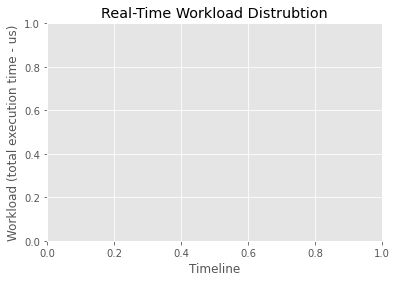

In [14]:
import json
f = open('G:\\test_data\\real_workload_times.txt', 'r')
f2 = open('G:\\test_data\\real_workload_workloads.txt', 'r')
js = f.read()
f.close()
js2 = f2.read()
f2.close()
times = json.loads(js)
workloads = json.loads(js2)
plt.figure("Draw")
plt.title('Real-Time Workload Distrubtion')
plt.xlabel("Timeline")
plt.ylabel("Workload (total execution time - us)")
i = 0
legend_list = []

for key,value in times.items():
    #print(key)
    #if key != "14" and key != "3":
    #    continue
    legend_list.append(key)
    w = workloads[key]
    plt.plot(value,w)
    #plt.ylim((0,30000))
    #print(len(value))
    #print(len(w))
    plt.draw()
    i += 1
    #if i == 2:
     #   break
#plt.legend(legend_list)


In [ ]:
import json
f = open('G:\\test_data\\real_workload_times.txt', 'r')
f2 = open('G:\\test_data\\real_workload_workloads.txt', 'r')
js = f.read()
f.close()
js2 = f2.read()
f2.close()
times = json.loads(js)
workloads = json.loads(js2)
plt.figure("Draw")
plt.title('Real-Time Workload Distrubtion(half of baseline settings)')
plt.xlabel("Timeline")
plt.ylabel("Workload (total execution time - us)")
i = 0
legend_list = []
for key,value in times.items():
    #print(key)
    if key != "4" and key != "3":
        continue
    legend_list.append(key)
    w = workloads[key]
    plt.plot(value,w)
    plt.draw()
    i += 1
    #if i == 2:
     #   break
plt.legend(legend_list)





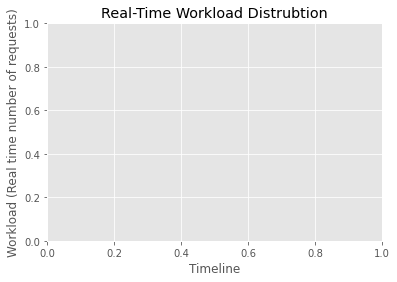

In [15]:
import json
f = open('G:\\test_data\\real_workload_times.txt', 'r')
js = f.read()
f.close()
times = json.loads(js)
f3 = open('G:\\test_data\\real_workload_requests.txt', 'r')
js3 = f3.read()
f3.close()
requests = json.loads(js3)
plt.figure("Draw")
plt.title('Real-Time Workload Distrubtion')
plt.xlabel("Timeline")
plt.ylabel("Workload (Real time number of requests)")
i = 0
legend_list = []
#plt.ylim((0, 8))  
for key,value in times.items():
    #print(key)
    #if key != "14" and key != "3":
    #    continue
    legend_list.append(key)
    w = requests[key]
    plt.plot(value,w)
    plt.draw()
    i += 1
    #if i == 2:
     #   break
#plt.legend(legend_list)

In [ ]:
import json
f = open('G:\\test_data\\real_workload_times.txt', 'r')
js = f.read()
f.close()
times = json.loads(js)
f3 = open('G:\\test_data\\real_workload_requests.txt', 'r')
js3 = f3.read()
f3.close()
requests = json.loads(js3)
plt.figure("Draw")
plt.title('Real-Time Workload Distrubtion(half of baseline settings)')
plt.xlabel("Timeline")
plt.ylabel("Workload (Real time number of requests)")
i = 0
#plt.ylim((0, 8))  
legend_list = []
for key,value in times.items():
    #print(key)
    if key != "10" and key != "2":
        continue
    legend_list.append(key)
    w = requests[key]
    plt.plot(value,w)
    plt.draw()
    i += 1
    #if i == 2:
     #   break
plt.legend(legend_list)

85320
85320
85320
85320


D:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:122: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


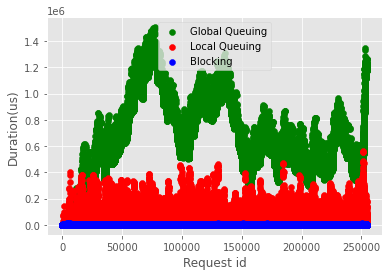

In [16]:
import json
f = open('G:\\test_data\\request_time.txt', 'r')
js = f.read()
f.close()
times = json.loads(js)
keys = list(times.keys())
int_keys = list(map(int, keys))
x=sorted(int_keys)
#print(x)
print(len(x))
y_list=list(times.values())

y_queuing=[]
y_runnable=[]
y_blocking=[]

for k in range(len(x)):
    y_queuing.append(times[str(x[k])][0])
    y_runnable.append(times[str(x[k])][1])
    y_blocking.append(times[str(x[k])][2])
print(len(y_queuing))
print(len(y_runnable))
print(len(y_blocking))
#print(y_queuing)
legend_list=["Global Queuing", "Local Queuing", "Blocking"]
#legend_list=["Local Queuing", "Blocking"]

#legend_list=["Global Queuing", "Blocking"]
plt.scatter(np.array(x), y_queuing,c='g')
plt.scatter(np.array(x), y_runnable, c='r')
plt.scatter(np.array(x), y_blocking,c ='b')

#plt.ylim((0, 90000))  
#plt.ylim((0,400000))
plt.xlabel("Request id")
plt.ylabel("Duration(us)")

plt.legend(legend_list)
plt.show()

85320


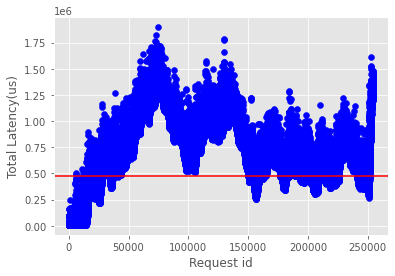

8847 9 [9, 1, 140, 8847, 0]


In [17]:
import json
f = open('G:\\test_data\\request_time.txt', 'r')
js = f.read()
f.close()
times = json.loads(js)
keys = list(times.keys())
int_keys = list(map(int, keys))
x=sorted(int_keys)
#print(x)
print(len(x))
y_list=list(times.values())

#deadline = 73076
deadline = 472592
y_latency=[]
yqueuing=[]

for k in range(len(x)):
    y_latency.append(times[str(x[k])][3])
    yqueuing.append(times[str(x[k])][0])

#print(y_latency)
plt.scatter(np.array(x), y_latency,c='b')
#plt.scatter(np.array(x), yqueuing,c='g')
plt.axhline(y=deadline,color='r')
plt.xlabel("Request id")
plt.ylabel("Total Latency(us)")

plt.show()

print(y_latency[1289], yqueuing[1289], times[str(x[1289])])

key is: mix_edf_105k-2
['64', '70', '74', '78', '80', '82', '84', '86', '88', '90', '92', '94', '96', '98', '100']
[39407.0, 40907.5, 41509.5, 42686.5, 42779.0, 42647.5, 43355.5, 42825.0, 44421.5, 49117.5, 49829.5, 53664.0, 84409.5, 112707.5]
key is: mix_edf_5k-2
['64', '70', '74', '78', '80', '82', '84', '86', '88', '90', '92', '94', '96', '98', '100']
[8486.5, 8359.5, 8480.0, 8567.0, 8499.0, 8547.5, 8579.0, 8743.5, 8753.5, 9429.0, 9552.0, 9639.5, 11175.5, 13182.0]
key is: mix_edf_5k
['64', '70', '74', '78', '80', '82', '84', '86', '88', '90', '92', '94', '96', '98', '100']
[8452.5, 8351.0, 8492.0, 8474.0, 8500.0, 8527.5, 8545.0, 8564.0, 8642.0, 9059.0, 9258.0, 9337.0, 10575.5, 11916.0]
key is: mix_edf_105k-3
['64', '70', '74', '78', '80', '82', '84', '86', '88', '90', '92', '94', '96', '98', '100']
[39191.5, 40670.5, 43621.5, 42505.0, 45890.0, 43159.5, 43526.5, 43096.0, 45408.5, 53101.0, 60530.0, 60245.5, 129050.0, 214900.0]
key is: mix_edf_40k
['64', '70', '74', '78', '80', '82', '8

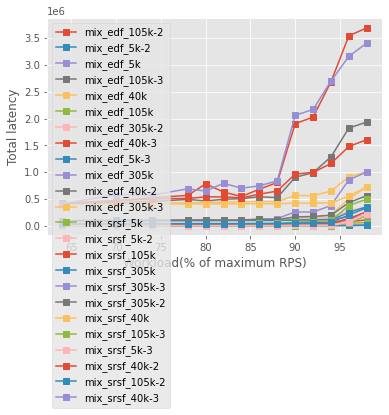

In [27]:
import json
f = open('G:\\test_data\\total_latency.txt', 'r')
js = f.read()
f.close()
latency = json.loads(js)
remove_n = 1

for key, value in latency.items():
    print("key is:", key)
    x_axis = list(value.keys())
    print(x_axis)
    x_axis_int = list(map(int, x_axis))
    x_axis_int = x_axis_int[:-remove_n]
    y_axis = list(value.values())
    y_axis_int = list(map(float, y_axis))
    y_axis_int = y_axis_int[:-remove_n]
    print(y_axis_int)
    if "single-different-deadline" in key:
        key = key.split("_")[1] + "-" +  key.split("_")[2] 
    #if "edf-5m" in key:
    #    plt.plot(x_axis_int, y_axis_int, 's-', label=key, c='r')
    #elif "edf-" in key:
    #    plt.plot(x_axis_int, y_axis_int, 's-', label=key, c='g')
    #elif "srsf-" in key:
    #    plt.plot(x_axis_int, y_axis_int, 's-', label=key, c='b')
    #else:
    #    plt.plot(x_axis_int, y_axis_int, 's-', label=key)
    plt.plot(x_axis_int, y_axis_int, 's-', label=key)
plt.legend(loc = "best")
plt.xlabel("Workload(% of maximum RPS)")
plt.ylabel("Total latency")
plt.show()

key is: mix_edf_105k-2
['64', '70', '74', '78', '80', '82', '84', '86', '88', '90', '92', '94', '96', '98', '100']
[38187.5, 38530.0, 38852.0, 39222.5, 39252.0, 39156.0, 39115.0, 39170.0, 39333.5, 39830.5, 39915.5, 39970.0, 40111.0, 40028.0]
key is: mix_edf_5k-2
['64', '70', '74', '78', '80', '82', '84', '86', '88', '90', '92', '94', '96', '98', '100']
[8113.0, 7968.0, 8050.5, 8063.0, 8056.0, 8060.0, 8088.0, 8143.0, 8099.0, 8226.0, 8353.0, 8297.0, 8319.0, 8296.0]
key is: mix_edf_5k
['64', '70', '74', '78', '80', '82', '84', '86', '88', '90', '92', '94', '96', '98', '100']
[8087.0, 7976.0, 8077.0, 8055.0, 8044.0, 8063.0, 8075.0, 8076.0, 8096.0, 8191.0, 8249.5, 8293.0, 8258.0, 8277.0]
key is: mix_edf_105k-3
['64', '70', '74', '78', '80', '82', '84', '86', '88', '90', '92', '94', '96', '98', '100']
[37941.5, 38475.5, 39052.0, 39045.5, 39161.0, 39142.5, 39152.5, 39145.5, 39335.5, 39788.0, 39987.5, 40009.0, 40020.0, 40052.0]
key is: mix_edf_40k
['64', '70', '74', '78', '80', '82', '84', '86

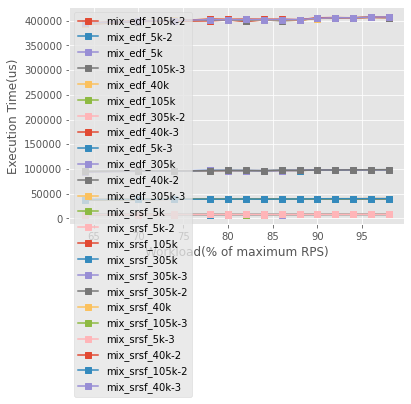

In [28]:
import json
f = open('G:\\test_data\\execution_time.txt', 'r')
js = f.read()
f.close()
execution_times = json.loads(js)
remove_n = 1

for key, value in execution_times.items():
    print("key is:", key)
    x_axis = list(value.keys())
    print(x_axis)
    x_axis_int = list(map(int, x_axis))
    x_axis_int = x_axis_int[:-remove_n]
    y_axis = list(value.values())
    y_axis_int = list(map(float, y_axis))
    y_axis_int = y_axis_int[:-remove_n]
    print(y_axis_int)
    if "single-different-deadline" in key:
        key = key.split("_")[1] + "-" +  key.split("_")[2] 
    #if "edf-5m" in key:
    #    plt.plot(x_axis_int, y_axis_int, 's-', label=key, c='r')
    #elif "edf-" in key:
    #    plt.plot(x_axis_int, y_axis_int, 's-', label=key, c='g')
    #elif "srsf-" in key:
    #    plt.plot(x_axis_int, y_axis_int, 's-', label=key, c='b')
    #else:
    #    plt.plot(x_axis_int, y_axis_int, 's-', label=key)
    plt.plot(x_axis_int, y_axis_int, 's-', label=key)
plt.legend(loc = "best")
plt.xlabel("Workload(% of maximum RPS)")
plt.ylabel("Execution Time(us)")
plt.show()

['64', '70', '74', '78', '80', '82', '84', '86', '88', '90', '92', '94', '96', '98', '100']
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04, 0.04, 0.04, 0.56, 1.26, 2.38, 33.86, 45.03, 49.81]
['64', '70', '74', '78', '80', '82', '84', '86', '88', '90', '92', '94', '96', '98', '100']
[0.43, 1.03, 2.07, 4.48, 3.28, 3.97, 5.34, 6.21, 6.55, 19.43, 22.29, 28.0, 56.0, 59.0, 64.57]
['64', '70', '74', '78', '80', '82', '84', '86', '88', '90', '92', '94', '96', '98', '100']
[0.0, 0.11, 0.11, 0.0, 0.09, 0.09, 0.09, 0.17, 0.42, 2.03, 3.81, 5.51, 38.31, 46.31, 50.92]
['64', '70', '74', '78', '80', '82', '84', '86', '88', '90', '92', '94', '96', '98', '100']
[0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.0, 0.0, 0.0, 0.01, 0.03, 0.42, 30.7, 42.74, 48.25]
['64', '70', '74', '78', '80', '82', '84', '86', '88', '90', '92', '94', '96', '98', '100']
[0.0, 0.34, 0.34, 1.21, 0.34, 1.38, 1.9, 3.62, 3.45, 17.14, 19.57, 32.86, 57.71, 61.29, 66.71]
['64', '70', '74', '78', '80', '82', '84', '86', '88', '90', '92', '94', '96', '98', '

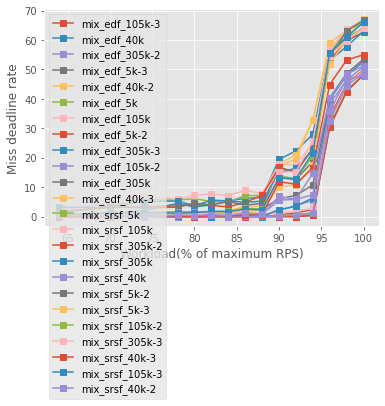

In [29]:
import json
f = open('G:\\test_data\\miss_deadline_rate.txt', 'r')
js = f.read()
f.close()
miss_rate = json.loads(js)
#color_list=['r','b','g']
#i=0
remove_n = 1

for key, value in miss_rate.items():
    x_axis = list(value.keys())
    print(x_axis)
    x_axis_int = list(map(int, x_axis))
    #x_axis_int = x_axis_int[:-remove_n]
    y_axis = list(value.values())
    print(y_axis)
    y_axis_int = list(map(float, y_axis))
    #y_axis_int = y_axis_int[:-remove_n]
    plt.plot(x_axis_int, y_axis_int, 's-',label=key)
    i = i+1
plt.legend(loc = "best")
plt.xlabel("Workload(% of maximum RPS)")
plt.ylabel("Miss deadline rate")
plt.show()

['64', '70', '74', '78', '80', '82', '84', '86', '88', '90', '92', '94', '96', '98', '100']
[0.02, 0.04, 1.22, 0.96, 1.04, 1.28, 1.34, 1.49, 5.75, 8.1, 11.43, 25.01, 48.17, 75.39, 94.76]
['64', '70', '74', '78', '80', '82', '84', '86', '88', '90', '92', '94', '96', '98', '100']
[0.02, 0.22, 2.64, 3.11, 3.17, 3.58, 4.2, 4.54, 11.54, 13.5, 17.79, 31.39, 53.05, 78.54, 95.65]
['64', '70', '74', '78', '80', '82', '84', '86', '88', '90', '92', '94', '96', '98', '100']
[0.42, 0.89, 1.92, 2.35, 4.38, 4.79, 6.55, 9.6, 17.24, 20.23, 25.31, 43.03, 61.9, 81.64, 94.83]
['64', '70', '74', '78', '80', '82', '84', '86', '88', '90', '92', '94', '96', '98', '100']
[0.26, 1.44, 2.34, 2.3, 3.76, 4.62, 6.34, 8.8, 16.16, 19.35, 24.12, 41.17, 60.36, 80.66, 94.3]
['64', '70', '74', '78', '80', '82', '84', '86', '88', '90', '92', '94', '96', '98', '100']
[0.0, 0.0, 1.13, 0.88, 0.99, 1.17, 1.26, 1.37, 5.68, 8.35, 11.3, 25.18, 48.35, 75.45, 94.78]
['64', '70', '74', '78', '80', '82', '84', '86', '88', '90', '92'

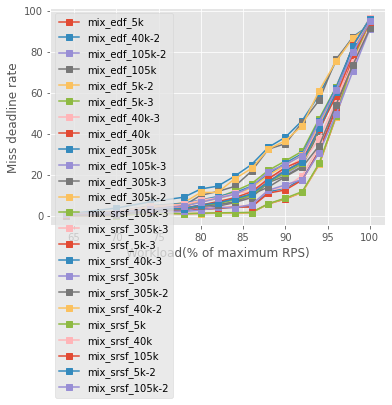

In [21]:
import json
f = open('G:\\test_data\\miss_deadline_rate.txt', 'r')
js = f.read()
f.close()
miss_rate = json.loads(js)
#color_list=['r','b','g']
#i=0
remove_n = 1

for key, value in miss_rate.items():
    x_axis = list(value.keys())
    print(x_axis)
    x_axis_int = list(map(int, x_axis))
    #x_axis_int = x_axis_int[:-remove_n]
    y_axis = list(value.values())
    print(y_axis)
    y_axis_int = list(map(float, y_axis))
    #y_axis_int = y_axis_int[:-remove_n]
    plt.plot(x_axis_int, y_axis_int, 's-',label=key)
    i = i+1
plt.legend(loc = "best")
plt.xlabel("Workload(% of maximum RPS)")
plt.ylabel("Miss deadline rate")
plt.show()

['64', '70', '74', '78', '80', '82', '84', '86', '88', '90', '92', '94', '96', '98', '100']
['64', '70', '74', '78', '80', '82', '84', '86', '88', '90', '92', '94', '96', '98', '100']


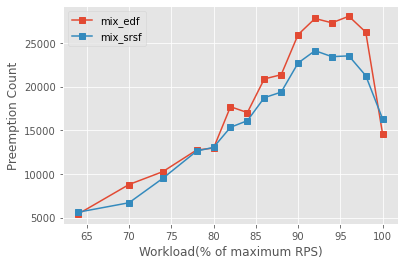

In [37]:
import json
f = open('G:\\test_data\\preemption.txt', 'r')
js = f.read()
f.close()
preempts = json.loads(js)
color_list=['r','b','g']
i=0

for key, value in preempts.items():
    if "single-different-deadline" in key:
        key = key.split("_")[1]
    x_axis = list(value.keys())
    print(x_axis)
    x_axis_int = list(map(int, x_axis))
    y_axis = list(value.values())
    y_axis_int = list(map(float, y_axis))
    plt.plot(x_axis_int, y_axis_int, 's-', label=key)
    i += 1
plt.legend(loc = "best")
plt.xlabel("Workload(% of maximum RPS)")
plt.ylabel("Preemption Count")
plt.show()

mix_edf
['64', '70', '74', '78', '80', '82', '84', '86', '88', '90', '92', '94', '96', '98', '100']
mix_srsf
['64', '70', '74', '78', '80', '82', '84', '86', '88', '90', '92', '94', '96', '98', '100']


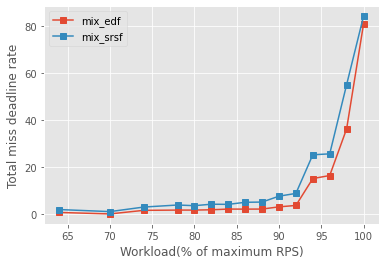

In [40]:
import json
f = open('G:\\test_data\\total_miss_deadline_rate.txt', 'r')
js = f.read()
f.close()
total_miss_rate = json.loads(js)
color_list=['r','b','g']
i=0
for key, value in total_miss_rate.items():
    print(key)
    if "single-different-deadline" in key:
        key = key.split("_")[1]
    x_axis = list(value.keys())
    print(x_axis)
    x_axis_int = list(map(int, x_axis))
    y_axis = list(value.values())
    y_axis_int = list(map(float, y_axis))
     
    #if "edf-5m" in key:
    #    plt.plot(x_axis_int, y_axis_int, 's-', label=key, c='r')
    #elif "edf" in key:
    #    plt.plot(x_axis_int, y_axis_int, 's-', label=key, c='g')
    #elif "srsf" in key:
    #    plt.plot(x_axis_int, y_axis_int, 's-', label=key, c='b')
    #else:
    #    plt.plot(x_axis_int, y_axis_int, 's-', label=key)
    plt.plot(x_axis_int, y_axis_int, 's-', label=key)
    i += 1
plt.legend(loc = "best")
#plt.legend(loc = "center left", bbox_to_anchor=(1, 0.5))
plt.xlabel("Workload(% of maximum RPS)")
plt.ylabel("Total miss deadline rate")
plt.show()

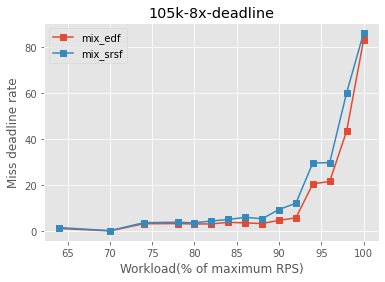

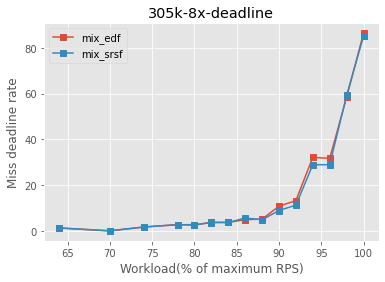

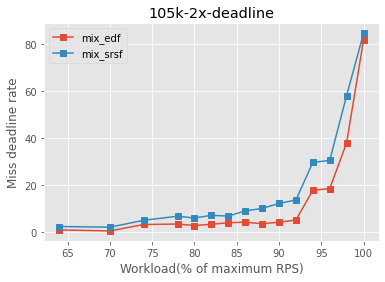

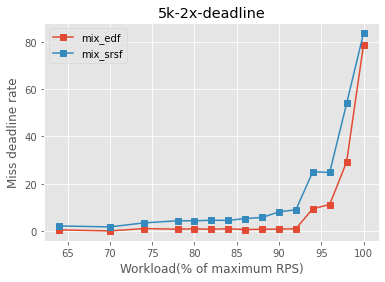

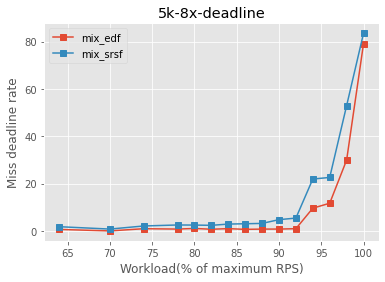

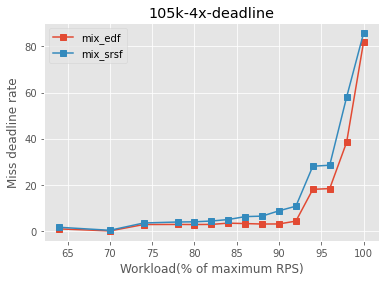

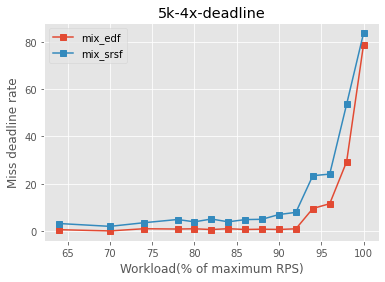

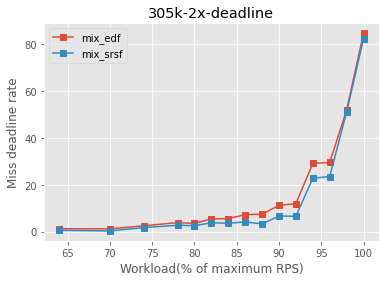

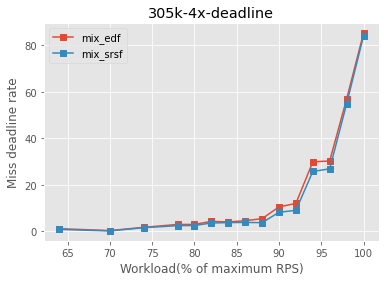

In [41]:
import json
f = open('G:\\test_data\\miss_deadline_rate.txt', 'r')
js = f.read()
f.close()
total_miss_rate = json.loads(js)
func_miss_deadline_rate=defaultdict(lambda: defaultdict(dict))

titles_dict = {
    "8": "8x-deadline",
    "4": "4x-deadline",
    "2": "2x-deadline"
}

for key, value in total_miss_rate.items():
    #print(key)
    func_name = key.split("_")[-1]
    policy = key.replace("_"+func_name, "")
    func_miss_deadline_rate[func_name][policy]=value

for key, value in func_miss_deadline_rate.items():
    func_name = key
    fig, ax = plt.subplots()
    for key2,value2 in value.items():
        policy = key2
        x_axis = list(value2.keys())
        x_axis_int = list(map(int, x_axis))
        y_axis = list(value2.values())
        y_axis_int = list(map(float, y_axis))
        if "single-different-deadline" in key2:
            key2 = key2.split("_")[1]
        ax.plot(x_axis_int, y_axis_int, 's-',label=key2)
    ax.legend(loc = "best")
    #print(key)
    title = ""
    if "-" in key:
        func = key.split("-")[0]
        index = key.split("-")[1]
        title = func + "-" + titles_dict[index]
    else:
        title = key + "-" + "2x-deadline"
    ax.set_title(title)
    ax.set_xlabel("Workload(% of maximum RPS)")
    ax.set_ylabel("Miss deadline rate")

['5', '7', '8', '9', '13', '11', '12', '2', '0', '4', '1', '6', '3', '10']
28747
['5', '1', '9', '3', '7', '11', '12', '13', '6', '10', '2', '0', '8', '4']
28744


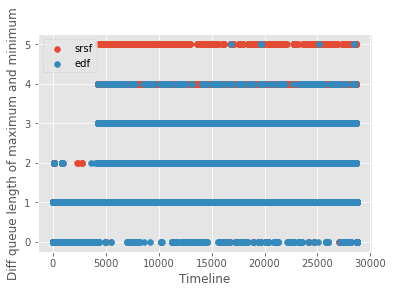

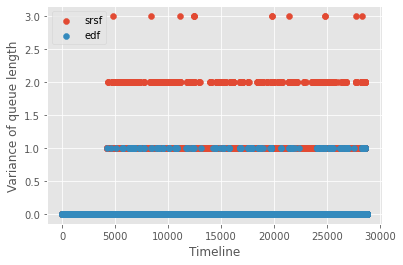

In [75]:
import json

def parse_file(file):
    #f = open('G:\\test_data\\srsf_queuelength.txt', 'r')
    f = open(file, 'r')
    js = f.read()
    f.close()
    queuelength = json.loads(js)
    color_list=['r','b','g']
    i=0

    length_list = []
    key_list = []
    diff_list = []
    variation_list = []
    for key, value in queuelength.items():
        #print(key, value)
        length_list.append(len(value))
        key_list.append(key)

    print(key_list)
    max_length = np.min(length_list)
    print(max_length)
    for i in range(max_length):
        min_length = 1000000
        max_length = -1
        length_list_at_this_moment = []
        for j in range(len(key_list)):
            length_list_at_this_moment.append(int(queuelength[key_list[j]][i]))
            if min_length > int(queuelength[key_list[j]][i]):
                min_length = int(queuelength[key_list[j]][i])
            if max_length < int(queuelength[key_list[j]][i]):
                max_length = int(queuelength[key_list[j]][i])
        diff = max_length - min_length
        diff_list.append(diff)
        #print(length_list_at_this_moment)
        variation_list.append(np.round(np.var(length_list_at_this_moment),3))
    #print(max_length, total_key) 
    #print(diff_list)
    #print(variation_list)
    return diff_list,variation_list

q_diff_dict = defaultdict(list)
q_var_dict = defaultdict(list)
def parse_files(file_list):
    for i in range(len(file_list)):
        file_name = file_list[i].split("\\")[2]
        legend = file_name.replace("_queuelength.txt", "")
        diff_list,var_list = parse_file(file_list[i])
        q_diff_dict[legend] = diff_list
        q_var_dict[legend] = var_list
        
#parse_files(['G:\\test_data\\srsf-broadcast_queuelength.txt','G:\\test_data\\edf-broadcast_queuelength.txt', 'G:\\test_data\\edf-triaged_queuelength.txt'])
parse_files(['G:\\test_data\\srsf_queuelength.txt','G:\\test_data\\edf_queuelength.txt'])

for key,value in q_diff_dict.items():
    x = range(0, len(value))
    y = [int(i) for i in value]
    #plt.plot(x, y, label=key)
    plt.scatter(np.array(x), y, label=key)

plt.legend(loc = "best")
plt.xlabel("Timeline")
plt.ylabel("Diff queue length of maximum and minimum")
plt.show()


for key,value in q_var_dict.items():
    x = range(0, len(value))
    y = [int(i) for i in value]
    #plt.plot(x, y, label=key)
    plt.scatter(np.array(x), y, label=key)
plt.legend(loc = "best")
plt.xlabel("Timeline")
plt.ylabel("Variance of queue length")
plt.show()

['5', '7', '8', '9', '13', '11', '12', '2', '0', '4', '1', '6', '3', '10']
28747
['5', '1', '9', '3', '7', '11', '12', '13', '6', '10', '2', '0', '8', '4']
28744
SRSF
EDF


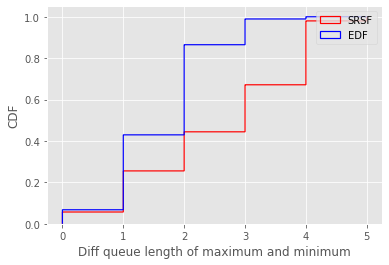

SRSF
EDF


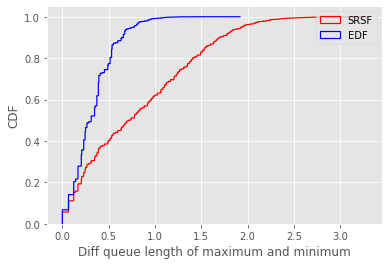

In [77]:
def parse_file(file):
    #f = open('G:\\test_data\\srsf_queuelength.txt', 'r')
    f = open(file, 'r')
    js = f.read()
    f.close()
    queuelength = json.loads(js)
    color_list=['r','b','g']
    i=0

    length_list = []
    key_list = []
    diff_list = []
    variation_list = []
    for key, value in queuelength.items():
        #print(key, value)
        length_list.append(len(value))
        key_list.append(key)

    print(key_list)
    max_length = np.min(length_list)
    print(max_length)
    for i in range(max_length):
        min_length = 1000000
        max_length = -1
        length_list_at_this_moment = []
        for j in range(len(key_list)):
            length_list_at_this_moment.append(int(queuelength[key_list[j]][i]))
            if min_length > int(queuelength[key_list[j]][i]):
                min_length = int(queuelength[key_list[j]][i])
            if max_length < int(queuelength[key_list[j]][i]):
                max_length = int(queuelength[key_list[j]][i])
        diff = max_length - min_length
        diff_list.append(diff)
        #print(length_list_at_this_moment)
        variation_list.append(np.round(np.var(length_list_at_this_moment),3))
    #print(max_length, total_key) 
    #print(diff_list)
    #print(variation_list)
    return diff_list,variation_list

def plot_cdf(distributions, name, output_format="png") -> None:
    i = 0
    fig, ax = plt.subplots()
    #ax.set_xlim([0, 1900000])
    #ax.set_title(title)
    ax.set_xlabel('Diff queue length of maximum and minimum')
    ax.set_ylabel('CDF')
    
    #ax.axvline(x=p,color='red', linestyle='--')
    #ax.axhline(y=0.5, color='red',linestyle='--')
        #print(p)
        #ax.annotate(str(p), xy=(p,0.5))
        #ax.set_title(name)
        #ax.set_xlabel('Latency(us)')
        #ax.set_ylabel('CDF')
    legent_list = ["SRSF", "EDF"]
    color_list = ['r', 'b']
    
    for dist in distributions: 
        print(legent_list[i])
        a = np.array(dist)
        p = np.percentile(a, 50)
        ax.hist(dist, 10000, cumulative=True,
                 density=True, histtype='step', linewidth=1.2, color=color_list[i], label=legent_list[i])     
        fix_hist_step_vertical_line_at_end(ax)
        ax.legend()
        i = i+1
    plt.show()

#legent_list = ["SRSF", "EDF"]
q_diff_dict = defaultdict(list)
q_var_dict = defaultdict(list)
def parse_files(file_list):
    for i in range(len(file_list)):
        file_name = file_list[i].split("\\")[2]
        legend = file_name.replace("_queuelength.txt", "")
        diff_list,var_list = parse_file(file_list[i])
        q_diff_dict[legend] = diff_list
        q_var_dict[legend] = var_list
        
#parse_files(['G:\\test_data\\srsf-broadcast_queuelength.txt','G:\\test_data\\edf-broadcast_queuelength.txt', 'G:\\test_data\\edf-triaged_queuelength.txt'])
parse_files(['G:\\test_data\\srsf_queuelength.txt','G:\\test_data\\edf_queuelength.txt'])

q_diff_lists=[]
q_var_lists= []
i = 0
for key, value in q_diff_dict.items():     
    q_diff_lists.append(value)
    q_var_lists.append(q_var_dict[key])
plot_cdf(q_diff_lists, name="", output_format=args.format)
    
plot_cdf(q_var_lists, name="", output_format=args.format)